##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/models/modify/model_maker/image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/models/modify/model_maker/image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

The [TensorFlow Lite Model Maker library](https://www.tensorflow.org/lite/models/modify/model_maker) simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [5]:
# !su/do apt -y install libportaudio2
# %pip install tflite-model-maker

^C
Note: you may need to restart the kernel to use updated packages.


Import the required packages.

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tflite_model_maker'

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [ ]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')


    16384/228813984 [..............................] - ETA: 1s


  8994816/228813984 [>.............................] - ETA: 1s


 19808256/228813984 [=>............................] - ETA: 1s


 30859264/228813984 [===>..........................] - ETA: 0s


 44457984/228813984 [====>.........................] - ETA: 0s


 52584448/228813984 [=====>........................] - ETA: 0s


 60923904/228813984 [======>.......................] - ETA: 0s


 70483968/228813984 [========>.....................] - ETA: 0s


 75595776/228813984 [========>.....................] - ETA: 0s


 86761472/228813984 [==========>...................] - ETA: 0s


 99016704/228813984 [===========>..................] - ETA: 0s


109608960/228813984 [=============>................] - ETA: 0s


124149760/228813984 [===============>..............] - ETA: 0s


137011200/228813984 [================>.............] - ETA: 0s


150077440/228813984 [==================>...........] - ETA: 0s


163315712/228813984 [====================>.........] - ETA: 0s


174039040/228813984 [=====================>........] - ETA: 0s


187138048/228813984 [=======================>......] - ETA: 0s


200228864/228813984 [=========================>....] - ETA: 0s


212271104/228813984 [==========================>...] - ETA: 0s


223272960/228813984 [============================>.] - ETA: 0s


228818944/228813984 [==============================] - 1s 0us/step



228827136/228813984 [==============================] - 1s 0us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in GitHub.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Step 2. Customize the TensorFlow model.

In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   


 rasLayerV1V2)                                                   


 dropout (Dropout)           (None, 1280)              0         


 dense (Dense)               (None, 5)                 6405      


Total params: 3,419,429


Trainable params: 6,405


Non-trainable params: 3,413,024


_________________________________________________________________


None
Epoch 1/5



  1/103 [..............................] - ETA: 5:18 - loss: 1.8686 - accuracy: 0.2188


  3/103 [..............................] - ETA: 2s - loss: 1.8096 - accuracy: 0.2396  


  5/103 [>.............................] - ETA: 2s - loss: 1.7123 - accuracy: 0.2937


  7/103 [=>............................] - ETA: 2s - loss: 1.6465 - accuracy: 0.3259


  9/103 [=>............................] - ETA: 2s - loss: 1.5812 - accuracy: 0.3542


 11/103 [==>...........................] - ETA: 2s - loss: 1.5493 - accuracy: 0.3722


 13/103 [==>...........................] - ETA: 2s - loss: 1.4973 - accuracy: 0.4038


 15/103 [===>..........................] - ETA: 2s - loss: 1.4594 - accuracy: 0.4208


 17/103 [===>..........................] - ETA: 2s - loss: 1.4105 - accuracy: 0.4522


 19/103 [====>.........................] - ETA: 2s - loss: 1.3594 - accuracy: 0.4868


 21/103 [=====>........................] - ETA: 2s - loss: 1.3231 - accuracy: 0.5104


 23/103 [=====>........................] - ETA: 2s - loss: 1.2794 - accuracy: 0.5367


 25/103 [======>.......................] - ETA: 2s - loss: 1.2412 - accuracy: 0.5600


 27/103 [======>.......................] - ETA: 2s - loss: 1.2091 - accuracy: 0.5799


 29/103 [=======>......................] - ETA: 1s - loss: 1.1805 - accuracy: 0.5948


 31/103 [========>.....................] - ETA: 1s - loss: 1.1564 - accuracy: 0.6089


 33/103 [========>.....................] - ETA: 1s - loss: 1.1294 - accuracy: 0.6269


 35/103 [=========>....................] - ETA: 1s - loss: 1.1076 - accuracy: 0.6384


 37/103 [=========>....................] - ETA: 1s - loss: 1.0869 - accuracy: 0.6495


 39/103 [==========>...................] - ETA: 1s - loss: 1.0751 - accuracy: 0.6579


 41/103 [==========>...................] - ETA: 1s - loss: 1.0557 - accuracy: 0.6677


 43/103 [===========>..................] - ETA: 1s - loss: 1.0370 - accuracy: 0.6802


 45/103 [============>.................] - ETA: 1s - loss: 1.0228 - accuracy: 0.6861


 47/103 [============>.................] - ETA: 1s - loss: 1.0084 - accuracy: 0.6941


 49/103 [=============>................] - ETA: 1s - loss: 1.0000 - accuracy: 0.7003


 51/103 [=============>................] - ETA: 1s - loss: 0.9913 - accuracy: 0.7047


 53/103 [==============>...............] - ETA: 1s - loss: 0.9785 - accuracy: 0.7123


 55/103 [===============>..............] - ETA: 1s - loss: 0.9724 - accuracy: 0.7131


 57/103 [===============>..............] - ETA: 1s - loss: 0.9648 - accuracy: 0.7171


 59/103 [================>.............] - ETA: 1s - loss: 0.9544 - accuracy: 0.7235


 61/103 [================>.............] - ETA: 1s - loss: 0.9475 - accuracy: 0.7269


 63/103 [=================>............] - ETA: 1s - loss: 0.9442 - accuracy: 0.7297


 65/103 [=================>............] - ETA: 1s - loss: 0.9389 - accuracy: 0.7332


 67/103 [==================>...........] - ETA: 0s - loss: 0.9346 - accuracy: 0.7351


 69/103 [===================>..........] - ETA: 0s - loss: 0.9272 - accuracy: 0.7382


 71/103 [===================>..........] - ETA: 0s - loss: 0.9187 - accuracy: 0.7438


 73/103 [====================>.........] - ETA: 0s - loss: 0.9112 - accuracy: 0.7479


 75/103 [====================>.........] - ETA: 0s - loss: 0.9063 - accuracy: 0.7508


 77/103 [=====================>........] - ETA: 0s - loss: 0.9028 - accuracy: 0.7520


 79/103 [======================>.......] - ETA: 0s - loss: 0.8971 - accuracy: 0.7555


 81/103 [======================>.......] - ETA: 0s - loss: 0.8908 - accuracy: 0.7589


 83/103 [=======================>......] - ETA: 0s - loss: 0.8864 - accuracy: 0.7613


 85/103 [=======================>......] - ETA: 0s - loss: 0.8825 - accuracy: 0.7632


 87/103 [========================>.....] - ETA: 0s - loss: 0.8797 - accuracy: 0.7647


 89/103 [========================>.....] - ETA: 0s - loss: 0.8760 - accuracy: 0.7679


 91/103 [=========================>....] - ETA: 0s - loss: 0.8734 - accuracy: 0.7692


 93/103 [==========================>...] - ETA: 0s - loss: 0.8705 - accuracy: 0.7708


 95/103 [==========================>...] - ETA: 0s - loss: 0.8668 - accuracy: 0.7734


 97/103 [===========================>..] - ETA: 0s - loss: 0.8625 - accuracy: 0.7761


 99/103 [===========================>..] - ETA: 0s - loss: 0.8623 - accuracy: 0.7768


101/103 [============================>.] - ETA: 0s - loss: 0.8594 - accuracy: 0.7778


103/103 [==============================] - ETA: 0s - loss: 0.8561 - accuracy: 0.7800


103/103 [==============================] - 6s 26ms/step - loss: 0.8561 - accuracy: 0.7800


Epoch 2/5



  1/103 [..............................] - ETA: 5s - loss: 0.6589 - accuracy: 0.9375


  3/103 [..............................] - ETA: 2s - loss: 0.6614 - accuracy: 0.8958


  5/103 [>.............................] - ETA: 2s - loss: 0.6594 - accuracy: 0.8813


  7/103 [=>............................] - ETA: 2s - loss: 0.6533 - accuracy: 0.8884


  9/103 [=>............................] - ETA: 2s - loss: 0.6574 - accuracy: 0.8854


 11/103 [==>...........................] - ETA: 2s - loss: 0.6595 - accuracy: 0.8835


 13/103 [==>...........................] - ETA: 2s - loss: 0.6523 - accuracy: 0.8894


 15/103 [===>..........................] - ETA: 2s - loss: 0.6598 - accuracy: 0.8875


 17/103 [===>..........................] - ETA: 2s - loss: 0.6580 - accuracy: 0.8879


 19/103 [====>.........................] - ETA: 2s - loss: 0.6552 - accuracy: 0.8931


 21/103 [=====>........................] - ETA: 2s - loss: 0.6552 - accuracy: 0.8943


 23/103 [=====>........................] - ETA: 2s - loss: 0.6540 - accuracy: 0.8913


 25/103 [======>.......................] - ETA: 2s - loss: 0.6503 - accuracy: 0.8925


 27/103 [======>.......................] - ETA: 2s - loss: 0.6568 - accuracy: 0.8877


 29/103 [=======>......................] - ETA: 1s - loss: 0.6585 - accuracy: 0.8901


 31/103 [========>.....................] - ETA: 1s - loss: 0.6568 - accuracy: 0.8911


 33/103 [========>.....................] - ETA: 1s - loss: 0.6517 - accuracy: 0.8930


 35/103 [=========>....................] - ETA: 1s - loss: 0.6484 - accuracy: 0.8955


 37/103 [=========>....................] - ETA: 1s - loss: 0.6458 - accuracy: 0.8953


 39/103 [==========>...................] - ETA: 1s - loss: 0.6483 - accuracy: 0.8942


 41/103 [==========>...................] - ETA: 1s - loss: 0.6468 - accuracy: 0.8941


 43/103 [===========>..................] - ETA: 1s - loss: 0.6449 - accuracy: 0.8968


 45/103 [============>.................] - ETA: 1s - loss: 0.6457 - accuracy: 0.8958


 47/103 [============>.................] - ETA: 1s - loss: 0.6433 - accuracy: 0.8956


 49/103 [=============>................] - ETA: 1s - loss: 0.6455 - accuracy: 0.8941


 51/103 [=============>................] - ETA: 1s - loss: 0.6476 - accuracy: 0.8934


 53/103 [==============>...............] - ETA: 1s - loss: 0.6444 - accuracy: 0.8956


 55/103 [===============>..............] - ETA: 1s - loss: 0.6460 - accuracy: 0.8938


 57/103 [===============>..............] - ETA: 1s - loss: 0.6482 - accuracy: 0.8925


 59/103 [================>.............] - ETA: 1s - loss: 0.6468 - accuracy: 0.8935


 61/103 [================>.............] - ETA: 1s - loss: 0.6477 - accuracy: 0.8929


 63/103 [=================>............] - ETA: 1s - loss: 0.6502 - accuracy: 0.8904


 65/103 [=================>............] - ETA: 1s - loss: 0.6506 - accuracy: 0.8913


 67/103 [==================>...........] - ETA: 0s - loss: 0.6513 - accuracy: 0.8899


 69/103 [===================>..........] - ETA: 0s - loss: 0.6510 - accuracy: 0.8899


 71/103 [===================>..........] - ETA: 0s - loss: 0.6496 - accuracy: 0.8913


 73/103 [====================>.........] - ETA: 0s - loss: 0.6480 - accuracy: 0.8930


 75/103 [====================>.........] - ETA: 0s - loss: 0.6490 - accuracy: 0.8929


 77/103 [=====================>........] - ETA: 0s - loss: 0.6502 - accuracy: 0.8916


 79/103 [======================>.......] - ETA: 0s - loss: 0.6491 - accuracy: 0.8920


 81/103 [======================>.......] - ETA: 0s - loss: 0.6477 - accuracy: 0.8935


 83/103 [=======================>......] - ETA: 0s - loss: 0.6470 - accuracy: 0.8934


 85/103 [=======================>......] - ETA: 0s - loss: 0.6472 - accuracy: 0.8938


 87/103 [========================>.....] - ETA: 0s - loss: 0.6474 - accuracy: 0.8933


 89/103 [========================>.....] - ETA: 0s - loss: 0.6488 - accuracy: 0.8936


 91/103 [=========================>....] - ETA: 0s - loss: 0.6496 - accuracy: 0.8939


 93/103 [==========================>...] - ETA: 0s - loss: 0.6507 - accuracy: 0.8935


 95/103 [==========================>...] - ETA: 0s - loss: 0.6500 - accuracy: 0.8938


 97/103 [===========================>..] - ETA: 0s - loss: 0.6487 - accuracy: 0.8947


 99/103 [===========================>..] - ETA: 0s - loss: 0.6500 - accuracy: 0.8939


101/103 [============================>.] - ETA: 0s - loss: 0.6510 - accuracy: 0.8936


103/103 [==============================] - ETA: 0s - loss: 0.6506 - accuracy: 0.8938


103/103 [==============================] - 3s 27ms/step - loss: 0.6506 - accuracy: 0.8938


Epoch 3/5



  1/103 [..............................] - ETA: 4s - loss: 0.5619 - accuracy: 0.9375


  3/103 [..............................] - ETA: 2s - loss: 0.6375 - accuracy: 0.8750


  5/103 [>.............................] - ETA: 2s - loss: 0.6491 - accuracy: 0.8750


  7/103 [=>............................] - ETA: 2s - loss: 0.6335 - accuracy: 0.8973


  9/103 [=>............................] - ETA: 2s - loss: 0.6304 - accuracy: 0.9062


 11/103 [==>...........................] - ETA: 2s - loss: 0.6256 - accuracy: 0.9148


 13/103 [==>...........................] - ETA: 2s - loss: 0.6158 - accuracy: 0.9255


 15/103 [===>..........................] - ETA: 2s - loss: 0.6246 - accuracy: 0.9208


 17/103 [===>..........................] - ETA: 2s - loss: 0.6227 - accuracy: 0.9246


 19/103 [====>.........................] - ETA: 2s - loss: 0.6241 - accuracy: 0.9227


 21/103 [=====>........................] - ETA: 2s - loss: 0.6211 - accuracy: 0.9241


 23/103 [=====>........................] - ETA: 2s - loss: 0.6212 - accuracy: 0.9239


 25/103 [======>.......................] - ETA: 2s - loss: 0.6156 - accuracy: 0.9262


 27/103 [======>.......................] - ETA: 2s - loss: 0.6175 - accuracy: 0.9236


 29/103 [=======>......................] - ETA: 1s - loss: 0.6201 - accuracy: 0.9213


 31/103 [========>.....................] - ETA: 1s - loss: 0.6196 - accuracy: 0.9214


 33/103 [========>.....................] - ETA: 1s - loss: 0.6165 - accuracy: 0.9223


 35/103 [=========>....................] - ETA: 1s - loss: 0.6128 - accuracy: 0.9241


 37/103 [=========>....................] - ETA: 1s - loss: 0.6110 - accuracy: 0.9240


 39/103 [==========>...................] - ETA: 1s - loss: 0.6136 - accuracy: 0.9207


 41/103 [==========>...................] - ETA: 1s - loss: 0.6121 - accuracy: 0.9200


 43/103 [===========>..................] - ETA: 1s - loss: 0.6104 - accuracy: 0.9208


 45/103 [============>.................] - ETA: 1s - loss: 0.6097 - accuracy: 0.9194


 47/103 [============>.................] - ETA: 1s - loss: 0.6087 - accuracy: 0.9195


 49/103 [=============>................] - ETA: 1s - loss: 0.6110 - accuracy: 0.9190


 51/103 [=============>................] - ETA: 1s - loss: 0.6122 - accuracy: 0.9173


 53/103 [==============>...............] - ETA: 1s - loss: 0.6105 - accuracy: 0.9180


 55/103 [===============>..............] - ETA: 1s - loss: 0.6128 - accuracy: 0.9159


 57/103 [===============>..............] - ETA: 1s - loss: 0.6138 - accuracy: 0.9156


 59/103 [================>.............] - ETA: 1s - loss: 0.6130 - accuracy: 0.9163


 61/103 [================>.............] - ETA: 1s - loss: 0.6131 - accuracy: 0.9165


 63/103 [=================>............] - ETA: 1s - loss: 0.6162 - accuracy: 0.9137


 65/103 [=================>............] - ETA: 1s - loss: 0.6168 - accuracy: 0.9139


 67/103 [==================>...........] - ETA: 0s - loss: 0.6171 - accuracy: 0.9142


 69/103 [===================>..........] - ETA: 0s - loss: 0.6178 - accuracy: 0.9139


 71/103 [===================>..........] - ETA: 0s - loss: 0.6164 - accuracy: 0.9146


 73/103 [====================>.........] - ETA: 0s - loss: 0.6154 - accuracy: 0.9144


 75/103 [====================>.........] - ETA: 0s - loss: 0.6164 - accuracy: 0.9133


 77/103 [=====================>........] - ETA: 0s - loss: 0.6183 - accuracy: 0.9123


 79/103 [======================>.......] - ETA: 0s - loss: 0.6176 - accuracy: 0.9126


 81/103 [======================>.......] - ETA: 0s - loss: 0.6176 - accuracy: 0.9120


 83/103 [=======================>......] - ETA: 0s - loss: 0.6174 - accuracy: 0.9119


 85/103 [=======================>......] - ETA: 0s - loss: 0.6174 - accuracy: 0.9125


 87/103 [========================>.....] - ETA: 0s - loss: 0.6183 - accuracy: 0.9113


 89/103 [========================>.....] - ETA: 0s - loss: 0.6192 - accuracy: 0.9105


 91/103 [=========================>....] - ETA: 0s - loss: 0.6200 - accuracy: 0.9107


 93/103 [==========================>...] - ETA: 0s - loss: 0.6201 - accuracy: 0.9113


 95/103 [==========================>...] - ETA: 0s - loss: 0.6202 - accuracy: 0.9112


 97/103 [===========================>..] - ETA: 0s - loss: 0.6191 - accuracy: 0.9117


 99/103 [===========================>..] - ETA: 0s - loss: 0.6208 - accuracy: 0.9104


101/103 [============================>.] - ETA: 0s - loss: 0.6212 - accuracy: 0.9103


103/103 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.9108


103/103 [==============================] - 3s 27ms/step - loss: 0.6209 - accuracy: 0.9108


Epoch 4/5



  1/103 [..............................] - ETA: 4s - loss: 0.5814 - accuracy: 0.9688


  3/103 [..............................] - ETA: 2s - loss: 0.6109 - accuracy: 0.9271


  5/103 [>.............................] - ETA: 2s - loss: 0.6099 - accuracy: 0.9187


  7/103 [=>............................] - ETA: 2s - loss: 0.6121 - accuracy: 0.9286


  9/103 [=>............................] - ETA: 2s - loss: 0.6197 - accuracy: 0.9306


 11/103 [==>...........................] - ETA: 2s - loss: 0.6212 - accuracy: 0.9261


 13/103 [==>...........................] - ETA: 2s - loss: 0.6140 - accuracy: 0.9303


 15/103 [===>..........................] - ETA: 2s - loss: 0.6190 - accuracy: 0.9271


 17/103 [===>..........................] - ETA: 2s - loss: 0.6195 - accuracy: 0.9301


 19/103 [====>.........................] - ETA: 2s - loss: 0.6177 - accuracy: 0.9309


 21/103 [=====>........................] - ETA: 2s - loss: 0.6172 - accuracy: 0.9301


 23/103 [=====>........................] - ETA: 2s - loss: 0.6146 - accuracy: 0.9321


 25/103 [======>.......................] - ETA: 2s - loss: 0.6105 - accuracy: 0.9337


 27/103 [======>.......................] - ETA: 2s - loss: 0.6090 - accuracy: 0.9329


 29/103 [=======>......................] - ETA: 1s - loss: 0.6097 - accuracy: 0.9289


 31/103 [========>.....................] - ETA: 1s - loss: 0.6077 - accuracy: 0.9304


 33/103 [========>.....................] - ETA: 1s - loss: 0.6062 - accuracy: 0.9299


 35/103 [=========>....................] - ETA: 1s - loss: 0.6031 - accuracy: 0.9304


 37/103 [=========>....................] - ETA: 1s - loss: 0.5993 - accuracy: 0.9333


 39/103 [==========>...................] - ETA: 1s - loss: 0.6028 - accuracy: 0.9303


 41/103 [==========>...................] - ETA: 1s - loss: 0.5998 - accuracy: 0.9322


 43/103 [===========>..................] - ETA: 1s - loss: 0.5981 - accuracy: 0.9324


 45/103 [============>.................] - ETA: 1s - loss: 0.5980 - accuracy: 0.9306


 47/103 [============>.................] - ETA: 1s - loss: 0.5968 - accuracy: 0.9295


 49/103 [=============>................] - ETA: 1s - loss: 0.5995 - accuracy: 0.9279


 51/103 [=============>................] - ETA: 1s - loss: 0.6004 - accuracy: 0.9271


 53/103 [==============>...............] - ETA: 1s - loss: 0.5994 - accuracy: 0.9281


 55/103 [===============>..............] - ETA: 1s - loss: 0.6024 - accuracy: 0.9261


 57/103 [===============>..............] - ETA: 1s - loss: 0.6029 - accuracy: 0.9254


 59/103 [================>.............] - ETA: 1s - loss: 0.6021 - accuracy: 0.9253


 61/103 [================>.............] - ETA: 1s - loss: 0.6018 - accuracy: 0.9257


 63/103 [=================>............] - ETA: 1s - loss: 0.6037 - accuracy: 0.9241


 65/103 [=================>............] - ETA: 1s - loss: 0.6040 - accuracy: 0.9255


 67/103 [==================>...........] - ETA: 0s - loss: 0.6049 - accuracy: 0.9244


 69/103 [===================>..........] - ETA: 0s - loss: 0.6050 - accuracy: 0.9244


 71/103 [===================>..........] - ETA: 0s - loss: 0.6029 - accuracy: 0.9261


 73/103 [====================>.........] - ETA: 0s - loss: 0.6016 - accuracy: 0.9277


 75/103 [====================>.........] - ETA: 0s - loss: 0.6026 - accuracy: 0.9262


 77/103 [=====================>........] - ETA: 0s - loss: 0.6042 - accuracy: 0.9257


 79/103 [======================>.......] - ETA: 0s - loss: 0.6035 - accuracy: 0.9252


 81/103 [======================>.......] - ETA: 0s - loss: 0.6027 - accuracy: 0.9259


 83/103 [=======================>......] - ETA: 0s - loss: 0.6031 - accuracy: 0.9255


 85/103 [=======================>......] - ETA: 0s - loss: 0.6029 - accuracy: 0.9250


 87/103 [========================>.....] - ETA: 0s - loss: 0.6027 - accuracy: 0.9256


 89/103 [========================>.....] - ETA: 0s - loss: 0.6030 - accuracy: 0.9249


 91/103 [=========================>....] - ETA: 0s - loss: 0.6029 - accuracy: 0.9255


 93/103 [==========================>...] - ETA: 0s - loss: 0.6037 - accuracy: 0.9254


 95/103 [==========================>...] - ETA: 0s - loss: 0.6032 - accuracy: 0.9250


 97/103 [===========================>..] - ETA: 0s - loss: 0.6024 - accuracy: 0.9253


 99/103 [===========================>..] - ETA: 0s - loss: 0.6038 - accuracy: 0.9239


101/103 [============================>.] - ETA: 0s - loss: 0.6042 - accuracy: 0.9236


103/103 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.9238


103/103 [==============================] - 3s 27ms/step - loss: 0.6037 - accuracy: 0.9238


Epoch 5/5



  1/103 [..............................] - ETA: 4s - loss: 0.5041 - accuracy: 1.0000


  3/103 [..............................] - ETA: 2s - loss: 0.5890 - accuracy: 0.9062


  5/103 [>.............................] - ETA: 2s - loss: 0.5989 - accuracy: 0.9062


  7/103 [=>............................] - ETA: 2s - loss: 0.5900 - accuracy: 0.9196


  9/103 [=>............................] - ETA: 2s - loss: 0.5904 - accuracy: 0.9236


 11/103 [==>...........................] - ETA: 2s - loss: 0.5930 - accuracy: 0.9261


 13/103 [==>...........................] - ETA: 2s - loss: 0.5904 - accuracy: 0.9327


 15/103 [===>..........................] - ETA: 2s - loss: 0.5919 - accuracy: 0.9375


 17/103 [===>..........................] - ETA: 2s - loss: 0.5929 - accuracy: 0.9357


 19/103 [====>.........................] - ETA: 2s - loss: 0.5911 - accuracy: 0.9359


 21/103 [=====>........................] - ETA: 2s - loss: 0.5899 - accuracy: 0.9360


 23/103 [=====>........................] - ETA: 2s - loss: 0.5895 - accuracy: 0.9348


 25/103 [======>.......................] - ETA: 2s - loss: 0.5834 - accuracy: 0.9388


 27/103 [======>.......................] - ETA: 2s - loss: 0.5834 - accuracy: 0.9387


 29/103 [=======>......................] - ETA: 1s - loss: 0.5872 - accuracy: 0.9343


 31/103 [========>.....................] - ETA: 1s - loss: 0.5871 - accuracy: 0.9355


 33/103 [========>.....................] - ETA: 1s - loss: 0.5838 - accuracy: 0.9366


 35/103 [=========>....................] - ETA: 1s - loss: 0.5802 - accuracy: 0.9402


 37/103 [=========>....................] - ETA: 1s - loss: 0.5777 - accuracy: 0.9417


 39/103 [==========>...................] - ETA: 1s - loss: 0.5801 - accuracy: 0.9383


 41/103 [==========>...................] - ETA: 1s - loss: 0.5787 - accuracy: 0.9383


 43/103 [===========>..................] - ETA: 1s - loss: 0.5776 - accuracy: 0.9382


 45/103 [============>.................] - ETA: 1s - loss: 0.5778 - accuracy: 0.9368


 47/103 [============>.................] - ETA: 1s - loss: 0.5759 - accuracy: 0.9382


 49/103 [=============>................] - ETA: 1s - loss: 0.5797 - accuracy: 0.9362


 51/103 [=============>................] - ETA: 1s - loss: 0.5794 - accuracy: 0.9375


 53/103 [==============>...............] - ETA: 1s - loss: 0.5775 - accuracy: 0.9393


 55/103 [===============>..............] - ETA: 1s - loss: 0.5803 - accuracy: 0.9375


 57/103 [===============>..............] - ETA: 1s - loss: 0.5811 - accuracy: 0.9380


 59/103 [================>.............] - ETA: 1s - loss: 0.5804 - accuracy: 0.9386


 61/103 [================>.............] - ETA: 1s - loss: 0.5816 - accuracy: 0.9370


 63/103 [=================>............] - ETA: 1s - loss: 0.5844 - accuracy: 0.9355


 65/103 [=================>............] - ETA: 1s - loss: 0.5842 - accuracy: 0.9351


 67/103 [==================>...........] - ETA: 0s - loss: 0.5846 - accuracy: 0.9342


 69/103 [===================>..........] - ETA: 0s - loss: 0.5845 - accuracy: 0.9343


 71/103 [===================>..........] - ETA: 0s - loss: 0.5826 - accuracy: 0.9357


 73/103 [====================>.........] - ETA: 0s - loss: 0.5813 - accuracy: 0.9362


 75/103 [====================>.........] - ETA: 0s - loss: 0.5822 - accuracy: 0.9350


 77/103 [=====================>........] - ETA: 0s - loss: 0.5835 - accuracy: 0.9347


 79/103 [======================>.......] - ETA: 0s - loss: 0.5829 - accuracy: 0.9343


 81/103 [======================>.......] - ETA: 0s - loss: 0.5821 - accuracy: 0.9356


 83/103 [=======================>......] - ETA: 0s - loss: 0.5821 - accuracy: 0.9349


 85/103 [=======================>......] - ETA: 0s - loss: 0.5826 - accuracy: 0.9353


 87/103 [========================>.....] - ETA: 0s - loss: 0.5832 - accuracy: 0.9353


 89/103 [========================>.....] - ETA: 0s - loss: 0.5850 - accuracy: 0.9343


 91/103 [=========================>....] - ETA: 0s - loss: 0.5855 - accuracy: 0.9341


 93/103 [==========================>...] - ETA: 0s - loss: 0.5871 - accuracy: 0.9331


 95/103 [==========================>...] - ETA: 0s - loss: 0.5876 - accuracy: 0.9332


 97/103 [===========================>..] - ETA: 0s - loss: 0.5868 - accuracy: 0.9336


 99/103 [===========================>..] - ETA: 0s - loss: 0.5879 - accuracy: 0.9331


101/103 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.9325


103/103 [==============================] - ETA: 0s - loss: 0.5875 - accuracy: 0.9329


103/103 [==============================] - 3s 27ms/step - loss: 0.5875 - accuracy: 0.9329


Step 3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)


 1/12 [=>............................] - ETA: 9s - loss: 0.6852 - accuracy: 0.8750


 3/12 [======>.......................] - ETA: 0s - loss: 0.6428 - accuracy: 0.8958


 5/12 [===========>..................] - ETA: 0s - loss: 0.6226 - accuracy: 0.9062


 7/12 [================>.............] - ETA: 0s - loss: 0.6034 - accuracy: 0.9196


 9/12 [=====================>........] - ETA: 0s - loss: 0.6019 - accuracy: 0.9236


11/12 [==========================>...] - ETA: 0s - loss: 0.6187 - accuracy: 0.9205


12/12 [==============================] - ETA: 0s - loss: 0.6185 - accuracy: 0.9183


12/12 [==============================] - 1s 34ms/step - loss: 0.6185 - accuracy: 0.9183


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/models/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full integer quantization for the image classification task.

You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='.')

2022-10-20 11:58:11.836026: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpym3ngr6d/assets


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpym3ngr6d/assets


/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-10-20 11:58:17.323789: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-20 11:58:17.323842: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmpfs/tmp/tmpyhq7nphm/labels.txt


INFO:tensorflow:Saving labels in /tmpfs/tmp/tmpyhq7nphm/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


After these simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

### Step 1: Load Input Data Specific to an On-device ML App

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

The dataset has the following directory structure:

<pre>
<b>flower_photos</b>
|__ <b>daisy</b>
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ <b>dandelion</b>
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ <b>roses</b>
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ <b>sunflowers</b>
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ <b>tulips</b>
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
</pre>

In [ ]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

Use `DataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [ ]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

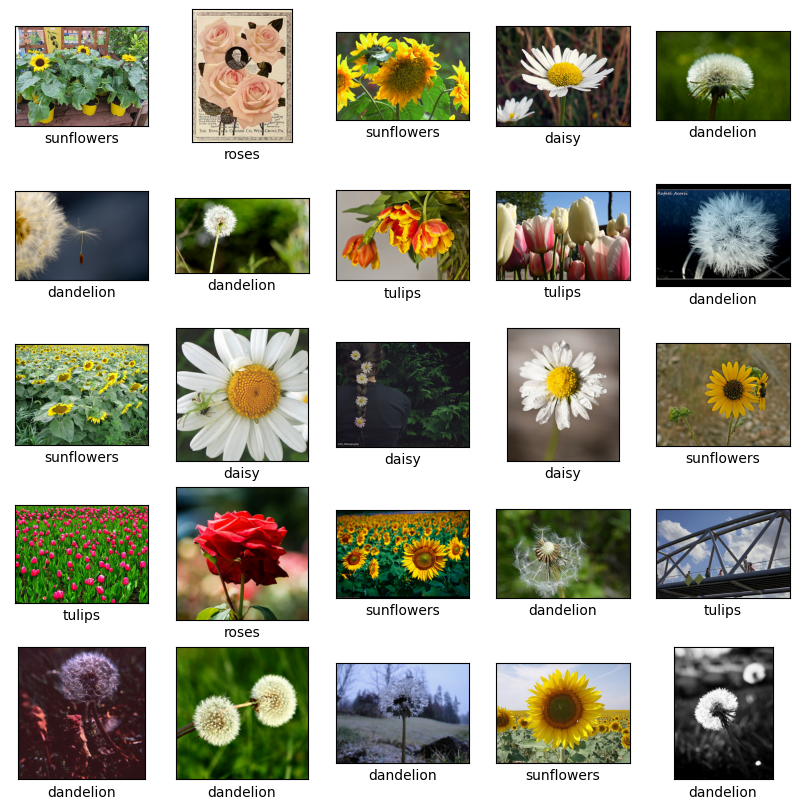

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   


 KerasLayerV1V2)                                                 


 dropout_1 (Dropout)         (None, 1280)              0         


 dense_1 (Dense)             (None, 5)                 6405      


Total params: 3,419,429


Trainable params: 6,405


Non-trainable params: 3,413,024


_________________________________________________________________


None
Epoch 1/5



 1/91 [..............................] - ETA: 2:20 - loss: 1.9692 - accuracy: 0.2812


 3/91 [..............................] - ETA: 2s - loss: 1.8528 - accuracy: 0.2396  


 5/91 [>.............................] - ETA: 2s - loss: 1.7939 - accuracy: 0.2313


 7/91 [=>............................] - ETA: 2s - loss: 1.7098 - accuracy: 0.2679


 9/91 [=>............................] - ETA: 2s - loss: 1.6396 - accuracy: 0.3021


11/91 [==>...........................] - ETA: 2s - loss: 1.5687 - accuracy: 0.3409


13/91 [===>..........................] - ETA: 2s - loss: 1.5050 - accuracy: 0.3750


15/91 [===>..........................] - ETA: 2s - loss: 1.4456 - accuracy: 0.4125


17/91 [====>.........................] - ETA: 1s - loss: 1.3982 - accuracy: 0.4485


19/91 [=====>........................] - ETA: 1s - loss: 1.3677 - accuracy: 0.4753


21/91 [=====>........................] - ETA: 1s - loss: 1.3262 - accuracy: 0.4985


23/91 [======>.......................] - ETA: 1s - loss: 1.2864 - accuracy: 0.5204


25/91 [=======>......................] - ETA: 1s - loss: 1.2454 - accuracy: 0.5475


27/91 [=======>......................] - ETA: 1s - loss: 1.2172 - accuracy: 0.5590


29/91 [========>.....................] - ETA: 1s - loss: 1.1948 - accuracy: 0.5700


31/91 [=========>....................] - ETA: 1s - loss: 1.1713 - accuracy: 0.5827


33/91 [=========>....................] - ETA: 1s - loss: 1.1536 - accuracy: 0.5928


35/91 [==========>...................] - ETA: 1s - loss: 1.1316 - accuracy: 0.6062


37/91 [===========>..................] - ETA: 1s - loss: 1.1172 - accuracy: 0.6149


39/91 [===========>..................] - ETA: 1s - loss: 1.1038 - accuracy: 0.6210


41/91 [============>.................] - ETA: 1s - loss: 1.0832 - accuracy: 0.6341


43/91 [=============>................] - ETA: 1s - loss: 1.0656 - accuracy: 0.6453


45/91 [=============>................] - ETA: 1s - loss: 1.0518 - accuracy: 0.6549


47/91 [==============>...............] - ETA: 1s - loss: 1.0379 - accuracy: 0.6629


49/91 [===============>..............] - ETA: 1s - loss: 1.0316 - accuracy: 0.6652


51/91 [===============>..............] - ETA: 1s - loss: 1.0192 - accuracy: 0.6728


53/91 [================>.............] - ETA: 1s - loss: 1.0069 - accuracy: 0.6810


55/91 [=================>............] - ETA: 0s - loss: 0.9986 - accuracy: 0.6847


57/91 [=================>............] - ETA: 0s - loss: 0.9911 - accuracy: 0.6891


59/91 [==================>...........] - ETA: 0s - loss: 0.9810 - accuracy: 0.6960


61/91 [===================>..........] - ETA: 0s - loss: 0.9730 - accuracy: 0.6998


63/91 [===================>..........] - ETA: 0s - loss: 0.9643 - accuracy: 0.7049


65/91 [====================>.........] - ETA: 0s - loss: 0.9589 - accuracy: 0.7082


67/91 [=====================>........] - ETA: 0s - loss: 0.9496 - accuracy: 0.7141


69/91 [=====================>........] - ETA: 0s - loss: 0.9423 - accuracy: 0.7174


71/91 [======================>.......] - ETA: 0s - loss: 0.9387 - accuracy: 0.7205


73/91 [=======================>......] - ETA: 0s - loss: 0.9326 - accuracy: 0.7239


75/91 [=======================>......] - ETA: 0s - loss: 0.9246 - accuracy: 0.7296


77/91 [========================>.....] - ETA: 0s - loss: 0.9191 - accuracy: 0.7334


79/91 [=========================>....] - ETA: 0s - loss: 0.9148 - accuracy: 0.7358


81/91 [=========================>....] - ETA: 0s - loss: 0.9083 - accuracy: 0.7400


83/91 [==========================>...] - ETA: 0s - loss: 0.9044 - accuracy: 0.7413


85/91 [===========================>..] - ETA: 0s - loss: 0.9016 - accuracy: 0.7430


87/91 [===========================>..] - ETA: 0s - loss: 0.8967 - accuracy: 0.7464


89/91 [============================>.] - ETA: 0s - loss: 0.8942 - accuracy: 0.7489


91/91 [==============================] - ETA: 0s - loss: 0.8894 - accuracy: 0.7517


91/91 [==============================] - 5s 38ms/step - loss: 0.8894 - accuracy: 0.7517 - val_loss: 0.7074 - val_accuracy: 0.8692


Epoch 2/5



 1/91 [..............................] - ETA: 3s - loss: 0.5664 - accuracy: 0.9375


 3/91 [..............................] - ETA: 2s - loss: 0.6484 - accuracy: 0.8750


 5/91 [>.............................] - ETA: 2s - loss: 0.6209 - accuracy: 0.9000


 7/91 [=>............................] - ETA: 2s - loss: 0.6299 - accuracy: 0.9107


 9/91 [=>............................] - ETA: 2s - loss: 0.6458 - accuracy: 0.8924


11/91 [==>...........................] - ETA: 2s - loss: 0.6351 - accuracy: 0.9062


13/91 [===>..........................] - ETA: 2s - loss: 0.6392 - accuracy: 0.9038


15/91 [===>..........................] - ETA: 1s - loss: 0.6369 - accuracy: 0.9083


17/91 [====>.........................] - ETA: 1s - loss: 0.6395 - accuracy: 0.9062


19/91 [=====>........................] - ETA: 1s - loss: 0.6523 - accuracy: 0.9030


21/91 [=====>........................] - ETA: 1s - loss: 0.6613 - accuracy: 0.8973


23/91 [======>.......................] - ETA: 1s - loss: 0.6691 - accuracy: 0.8954


25/91 [=======>......................] - ETA: 1s - loss: 0.6633 - accuracy: 0.8963


27/91 [=======>......................] - ETA: 1s - loss: 0.6610 - accuracy: 0.8981


29/91 [========>.....................] - ETA: 1s - loss: 0.6634 - accuracy: 0.8966


31/91 [=========>....................] - ETA: 1s - loss: 0.6632 - accuracy: 0.8982


33/91 [=========>....................] - ETA: 1s - loss: 0.6645 - accuracy: 0.8949


35/91 [==========>...................] - ETA: 1s - loss: 0.6653 - accuracy: 0.8955


37/91 [===========>..................] - ETA: 1s - loss: 0.6706 - accuracy: 0.8936


39/91 [===========>..................] - ETA: 1s - loss: 0.6719 - accuracy: 0.8934


41/91 [============>.................] - ETA: 1s - loss: 0.6700 - accuracy: 0.8956


43/91 [=============>................] - ETA: 1s - loss: 0.6662 - accuracy: 0.8990


45/91 [=============>................] - ETA: 1s - loss: 0.6628 - accuracy: 0.9014


47/91 [==============>...............] - ETA: 1s - loss: 0.6610 - accuracy: 0.9023


49/91 [===============>..............] - ETA: 1s - loss: 0.6652 - accuracy: 0.9005


51/91 [===============>..............] - ETA: 1s - loss: 0.6648 - accuracy: 0.9020


53/91 [================>.............] - ETA: 0s - loss: 0.6646 - accuracy: 0.9009


55/91 [=================>............] - ETA: 0s - loss: 0.6641 - accuracy: 0.9000


57/91 [=================>............] - ETA: 0s - loss: 0.6673 - accuracy: 0.8964


59/91 [==================>...........] - ETA: 0s - loss: 0.6671 - accuracy: 0.8951


61/91 [===================>..........] - ETA: 0s - loss: 0.6670 - accuracy: 0.8955


63/91 [===================>..........] - ETA: 0s - loss: 0.6649 - accuracy: 0.8973


65/91 [====================>.........] - ETA: 0s - loss: 0.6649 - accuracy: 0.8966


67/91 [=====================>........] - ETA: 0s - loss: 0.6621 - accuracy: 0.8983


69/91 [=====================>........] - ETA: 0s - loss: 0.6622 - accuracy: 0.8986


71/91 [======================>.......] - ETA: 0s - loss: 0.6648 - accuracy: 0.8961


73/91 [=======================>......] - ETA: 0s - loss: 0.6647 - accuracy: 0.8960


75/91 [=======================>......] - ETA: 0s - loss: 0.6623 - accuracy: 0.8971


77/91 [========================>.....] - ETA: 0s - loss: 0.6619 - accuracy: 0.8969


79/91 [=========================>....] - ETA: 0s - loss: 0.6614 - accuracy: 0.8968


81/91 [=========================>....] - ETA: 0s - loss: 0.6596 - accuracy: 0.8974


83/91 [==========================>...] - ETA: 0s - loss: 0.6601 - accuracy: 0.8972


85/91 [===========================>..] - ETA: 0s - loss: 0.6610 - accuracy: 0.8963


87/91 [===========================>..] - ETA: 0s - loss: 0.6595 - accuracy: 0.8962


89/91 [============================>.] - ETA: 0s - loss: 0.6607 - accuracy: 0.8957


91/91 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.8970


91/91 [==============================] - 3s 33ms/step - loss: 0.6595 - accuracy: 0.8970 - val_loss: 0.6655 - val_accuracy: 0.8937


Epoch 3/5



 1/91 [..............................] - ETA: 4s - loss: 0.5201 - accuracy: 0.9688


 3/91 [..............................] - ETA: 2s - loss: 0.6160 - accuracy: 0.8958


 5/91 [>.............................] - ETA: 2s - loss: 0.5890 - accuracy: 0.9187


 7/91 [=>............................] - ETA: 2s - loss: 0.5938 - accuracy: 0.9196


 9/91 [=>............................] - ETA: 2s - loss: 0.6000 - accuracy: 0.9132


11/91 [==>...........................] - ETA: 2s - loss: 0.5944 - accuracy: 0.9205


13/91 [===>..........................] - ETA: 2s - loss: 0.6016 - accuracy: 0.9183


15/91 [===>..........................] - ETA: 1s - loss: 0.6009 - accuracy: 0.9187


17/91 [====>.........................] - ETA: 1s - loss: 0.6002 - accuracy: 0.9228


19/91 [=====>........................] - ETA: 1s - loss: 0.6125 - accuracy: 0.9145


21/91 [=====>........................] - ETA: 1s - loss: 0.6209 - accuracy: 0.9137


23/91 [======>.......................] - ETA: 1s - loss: 0.6213 - accuracy: 0.9117


25/91 [=======>......................] - ETA: 1s - loss: 0.6160 - accuracy: 0.9137


27/91 [=======>......................] - ETA: 1s - loss: 0.6151 - accuracy: 0.9155


29/91 [========>.....................] - ETA: 1s - loss: 0.6157 - accuracy: 0.9149


31/91 [=========>....................] - ETA: 1s - loss: 0.6152 - accuracy: 0.9163


33/91 [=========>....................] - ETA: 1s - loss: 0.6178 - accuracy: 0.9148


35/91 [==========>...................] - ETA: 1s - loss: 0.6202 - accuracy: 0.9134


37/91 [===========>..................] - ETA: 1s - loss: 0.6228 - accuracy: 0.9113


39/91 [===========>..................] - ETA: 1s - loss: 0.6239 - accuracy: 0.9087


41/91 [============>.................] - ETA: 1s - loss: 0.6224 - accuracy: 0.9093


43/91 [=============>................] - ETA: 1s - loss: 0.6195 - accuracy: 0.9113


45/91 [=============>................] - ETA: 1s - loss: 0.6182 - accuracy: 0.9125


47/91 [==============>...............] - ETA: 1s - loss: 0.6160 - accuracy: 0.9142


49/91 [===============>..............] - ETA: 1s - loss: 0.6200 - accuracy: 0.9114


51/91 [===============>..............] - ETA: 1s - loss: 0.6199 - accuracy: 0.9118


53/91 [================>.............] - ETA: 0s - loss: 0.6201 - accuracy: 0.9110


55/91 [=================>............] - ETA: 0s - loss: 0.6210 - accuracy: 0.9108


57/91 [=================>............] - ETA: 0s - loss: 0.6230 - accuracy: 0.9095


59/91 [==================>...........] - ETA: 0s - loss: 0.6215 - accuracy: 0.9110


61/91 [===================>..........] - ETA: 0s - loss: 0.6223 - accuracy: 0.9109


63/91 [===================>..........] - ETA: 0s - loss: 0.6220 - accuracy: 0.9112


65/91 [====================>.........] - ETA: 0s - loss: 0.6239 - accuracy: 0.9101


67/91 [=====================>........] - ETA: 0s - loss: 0.6216 - accuracy: 0.9114


69/91 [=====================>........] - ETA: 0s - loss: 0.6220 - accuracy: 0.9103


71/91 [======================>.......] - ETA: 0s - loss: 0.6242 - accuracy: 0.9085


73/91 [=======================>......] - ETA: 0s - loss: 0.6256 - accuracy: 0.9080


75/91 [=======================>......] - ETA: 0s - loss: 0.6243 - accuracy: 0.9083


77/91 [========================>.....] - ETA: 0s - loss: 0.6236 - accuracy: 0.9087


79/91 [=========================>....] - ETA: 0s - loss: 0.6245 - accuracy: 0.9082


81/91 [=========================>....] - ETA: 0s - loss: 0.6243 - accuracy: 0.9082


83/91 [==========================>...] - ETA: 0s - loss: 0.6242 - accuracy: 0.9085


85/91 [===========================>..] - ETA: 0s - loss: 0.6259 - accuracy: 0.9077


87/91 [===========================>..] - ETA: 0s - loss: 0.6251 - accuracy: 0.9080


89/91 [============================>.] - ETA: 0s - loss: 0.6260 - accuracy: 0.9080


91/91 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.9080


91/91 [==============================] - 3s 34ms/step - loss: 0.6253 - accuracy: 0.9080 - val_loss: 0.6495 - val_accuracy: 0.8992


Epoch 4/5



 1/91 [..............................] - ETA: 4s - loss: 0.4996 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.5963 - accuracy: 0.9271


 5/91 [>.............................] - ETA: 2s - loss: 0.5745 - accuracy: 0.9312


 7/91 [=>............................] - ETA: 2s - loss: 0.5687 - accuracy: 0.9375


 9/91 [=>............................] - ETA: 2s - loss: 0.5754 - accuracy: 0.9271


11/91 [==>...........................] - ETA: 2s - loss: 0.5660 - accuracy: 0.9375


13/91 [===>..........................] - ETA: 2s - loss: 0.5742 - accuracy: 0.9303


15/91 [===>..........................] - ETA: 1s - loss: 0.5730 - accuracy: 0.9333


17/91 [====>.........................] - ETA: 1s - loss: 0.5785 - accuracy: 0.9320


19/91 [=====>........................] - ETA: 1s - loss: 0.5861 - accuracy: 0.9326


21/91 [=====>........................] - ETA: 1s - loss: 0.5947 - accuracy: 0.9286


23/91 [======>.......................] - ETA: 1s - loss: 0.5951 - accuracy: 0.9307


25/91 [=======>......................] - ETA: 1s - loss: 0.5908 - accuracy: 0.9312


27/91 [=======>......................] - ETA: 1s - loss: 0.5901 - accuracy: 0.9306


29/91 [========>.....................] - ETA: 1s - loss: 0.5939 - accuracy: 0.9267


31/91 [=========>....................] - ETA: 1s - loss: 0.5951 - accuracy: 0.9274


33/91 [=========>....................] - ETA: 1s - loss: 0.5977 - accuracy: 0.9252


35/91 [==========>...................] - ETA: 1s - loss: 0.5989 - accuracy: 0.9250


37/91 [===========>..................] - ETA: 1s - loss: 0.6008 - accuracy: 0.9240


39/91 [===========>..................] - ETA: 1s - loss: 0.6030 - accuracy: 0.9231


41/91 [============>.................] - ETA: 1s - loss: 0.5992 - accuracy: 0.9253


43/91 [=============>................] - ETA: 1s - loss: 0.5966 - accuracy: 0.9281


45/91 [=============>................] - ETA: 1s - loss: 0.5942 - accuracy: 0.9299


47/91 [==============>...............] - ETA: 1s - loss: 0.5930 - accuracy: 0.9309


49/91 [===============>..............] - ETA: 1s - loss: 0.5978 - accuracy: 0.9279


51/91 [===============>..............] - ETA: 1s - loss: 0.5978 - accuracy: 0.9283


53/91 [================>.............] - ETA: 0s - loss: 0.5974 - accuracy: 0.9287


55/91 [=================>............] - ETA: 0s - loss: 0.5985 - accuracy: 0.9273


57/91 [=================>............] - ETA: 0s - loss: 0.6020 - accuracy: 0.9243


59/91 [==================>...........] - ETA: 0s - loss: 0.6009 - accuracy: 0.9258


61/91 [===================>..........] - ETA: 0s - loss: 0.6014 - accuracy: 0.9252


63/91 [===================>..........] - ETA: 0s - loss: 0.6009 - accuracy: 0.9251


65/91 [====================>.........] - ETA: 0s - loss: 0.6016 - accuracy: 0.9250


67/91 [=====================>........] - ETA: 0s - loss: 0.5994 - accuracy: 0.9268


69/91 [=====================>........] - ETA: 0s - loss: 0.6000 - accuracy: 0.9271


71/91 [======================>.......] - ETA: 0s - loss: 0.6009 - accuracy: 0.9269


73/91 [=======================>......] - ETA: 0s - loss: 0.6018 - accuracy: 0.9264


75/91 [=======================>......] - ETA: 0s - loss: 0.5998 - accuracy: 0.9275


77/91 [========================>.....] - ETA: 0s - loss: 0.6004 - accuracy: 0.9269


79/91 [=========================>....] - ETA: 0s - loss: 0.6024 - accuracy: 0.9256


81/91 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.9259


83/91 [==========================>...] - ETA: 0s - loss: 0.6023 - accuracy: 0.9262


85/91 [===========================>..] - ETA: 0s - loss: 0.6043 - accuracy: 0.9254


87/91 [===========================>..] - ETA: 0s - loss: 0.6044 - accuracy: 0.9249


89/91 [============================>.] - ETA: 0s - loss: 0.6053 - accuracy: 0.9242


91/91 [==============================] - ETA: 0s - loss: 0.6050 - accuracy: 0.9241


91/91 [==============================] - 3s 33ms/step - loss: 0.6050 - accuracy: 0.9241 - val_loss: 0.6369 - val_accuracy: 0.9101


Epoch 5/5



 1/91 [..............................] - ETA: 4s - loss: 0.5198 - accuracy: 0.9688


 3/91 [..............................] - ETA: 2s - loss: 0.5539 - accuracy: 0.9375


 5/91 [>.............................] - ETA: 2s - loss: 0.5443 - accuracy: 0.9438


 7/91 [=>............................] - ETA: 2s - loss: 0.5524 - accuracy: 0.9464


 9/91 [=>............................] - ETA: 2s - loss: 0.5641 - accuracy: 0.9340


11/91 [==>...........................] - ETA: 2s - loss: 0.5587 - accuracy: 0.9403


13/91 [===>..........................] - ETA: 2s - loss: 0.5685 - accuracy: 0.9351


15/91 [===>..........................] - ETA: 1s - loss: 0.5650 - accuracy: 0.9354


17/91 [====>.........................] - ETA: 1s - loss: 0.5676 - accuracy: 0.9357


19/91 [=====>........................] - ETA: 1s - loss: 0.5761 - accuracy: 0.9326


21/91 [=====>........................] - ETA: 1s - loss: 0.5817 - accuracy: 0.9301


23/91 [======>.......................] - ETA: 1s - loss: 0.5818 - accuracy: 0.9321


25/91 [=======>......................] - ETA: 1s - loss: 0.5781 - accuracy: 0.9325


27/91 [=======>......................] - ETA: 1s - loss: 0.5776 - accuracy: 0.9317


29/91 [========>.....................] - ETA: 1s - loss: 0.5786 - accuracy: 0.9321


31/91 [=========>....................] - ETA: 1s - loss: 0.5791 - accuracy: 0.9335


33/91 [=========>....................] - ETA: 1s - loss: 0.5819 - accuracy: 0.9337


35/91 [==========>...................] - ETA: 1s - loss: 0.5837 - accuracy: 0.9321


37/91 [===========>..................] - ETA: 1s - loss: 0.5830 - accuracy: 0.9324


39/91 [===========>..................] - ETA: 1s - loss: 0.5866 - accuracy: 0.9279


41/91 [============>.................] - ETA: 1s - loss: 0.5838 - accuracy: 0.9299


43/91 [=============>................] - ETA: 1s - loss: 0.5818 - accuracy: 0.9317


45/91 [=============>................] - ETA: 1s - loss: 0.5820 - accuracy: 0.9319


47/91 [==============>...............] - ETA: 1s - loss: 0.5794 - accuracy: 0.9342


49/91 [===============>..............] - ETA: 1s - loss: 0.5841 - accuracy: 0.9318


51/91 [===============>..............] - ETA: 1s - loss: 0.5832 - accuracy: 0.9338


53/91 [================>.............] - ETA: 0s - loss: 0.5859 - accuracy: 0.9322


55/91 [=================>............] - ETA: 0s - loss: 0.5873 - accuracy: 0.9312


57/91 [=================>............] - ETA: 0s - loss: 0.5899 - accuracy: 0.9298


59/91 [==================>...........] - ETA: 0s - loss: 0.5888 - accuracy: 0.9306


61/91 [===================>..........] - ETA: 0s - loss: 0.5881 - accuracy: 0.9319


63/91 [===================>..........] - ETA: 0s - loss: 0.5875 - accuracy: 0.9325


65/91 [====================>.........] - ETA: 0s - loss: 0.5892 - accuracy: 0.9322


67/91 [=====================>........] - ETA: 0s - loss: 0.5880 - accuracy: 0.9328


69/91 [=====================>........] - ETA: 0s - loss: 0.5885 - accuracy: 0.9325


71/91 [======================>.......] - ETA: 0s - loss: 0.5898 - accuracy: 0.9318


73/91 [=======================>......] - ETA: 0s - loss: 0.5890 - accuracy: 0.9319


75/91 [=======================>......] - ETA: 0s - loss: 0.5876 - accuracy: 0.9325


77/91 [========================>.....] - ETA: 0s - loss: 0.5869 - accuracy: 0.9334


79/91 [=========================>....] - ETA: 0s - loss: 0.5881 - accuracy: 0.9320


81/91 [=========================>....] - ETA: 0s - loss: 0.5869 - accuracy: 0.9329


83/91 [==========================>...] - ETA: 0s - loss: 0.5864 - accuracy: 0.9334


85/91 [===========================>..] - ETA: 0s - loss: 0.5871 - accuracy: 0.9324


87/91 [===========================>..] - ETA: 0s - loss: 0.5869 - accuracy: 0.9325


89/91 [============================>.] - ETA: 0s - loss: 0.5883 - accuracy: 0.9315


91/91 [==============================] - ETA: 0s - loss: 0.5872 - accuracy: 0.9323


91/91 [==============================] - 3s 34ms/step - loss: 0.5872 - accuracy: 0.9323 - val_loss: 0.6313 - val_accuracy: 0.9155


Have a look at the detailed model structure.

In [ ]:
model.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   


 KerasLayerV1V2)                                                 


 dropout_1 (Dropout)         (None, 1280)              0         


 dense_1 (Dense)             (None, 5)                 6405      


Total params: 3,419,429


Trainable params: 6,405


Non-trainable params: 3,413,024


_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)


 1/12 [=>............................] - ETA: 4s - loss: 0.5909 - accuracy: 0.9375


 3/12 [======>.......................] - ETA: 0s - loss: 0.6030 - accuracy: 0.9375


 5/12 [===========>..................] - ETA: 0s - loss: 0.6178 - accuracy: 0.9250


 7/12 [================>.............] - ETA: 0s - loss: 0.6196 - accuracy: 0.9107


 9/12 [=====================>........] - ETA: 0s - loss: 0.6205 - accuracy: 0.9062


11/12 [==========================>...] - ETA: 0s - loss: 0.6159 - accuracy: 0.9091


12/12 [==============================] - 1s 25ms/step - loss: 0.6185 - accuracy: 0.9101


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

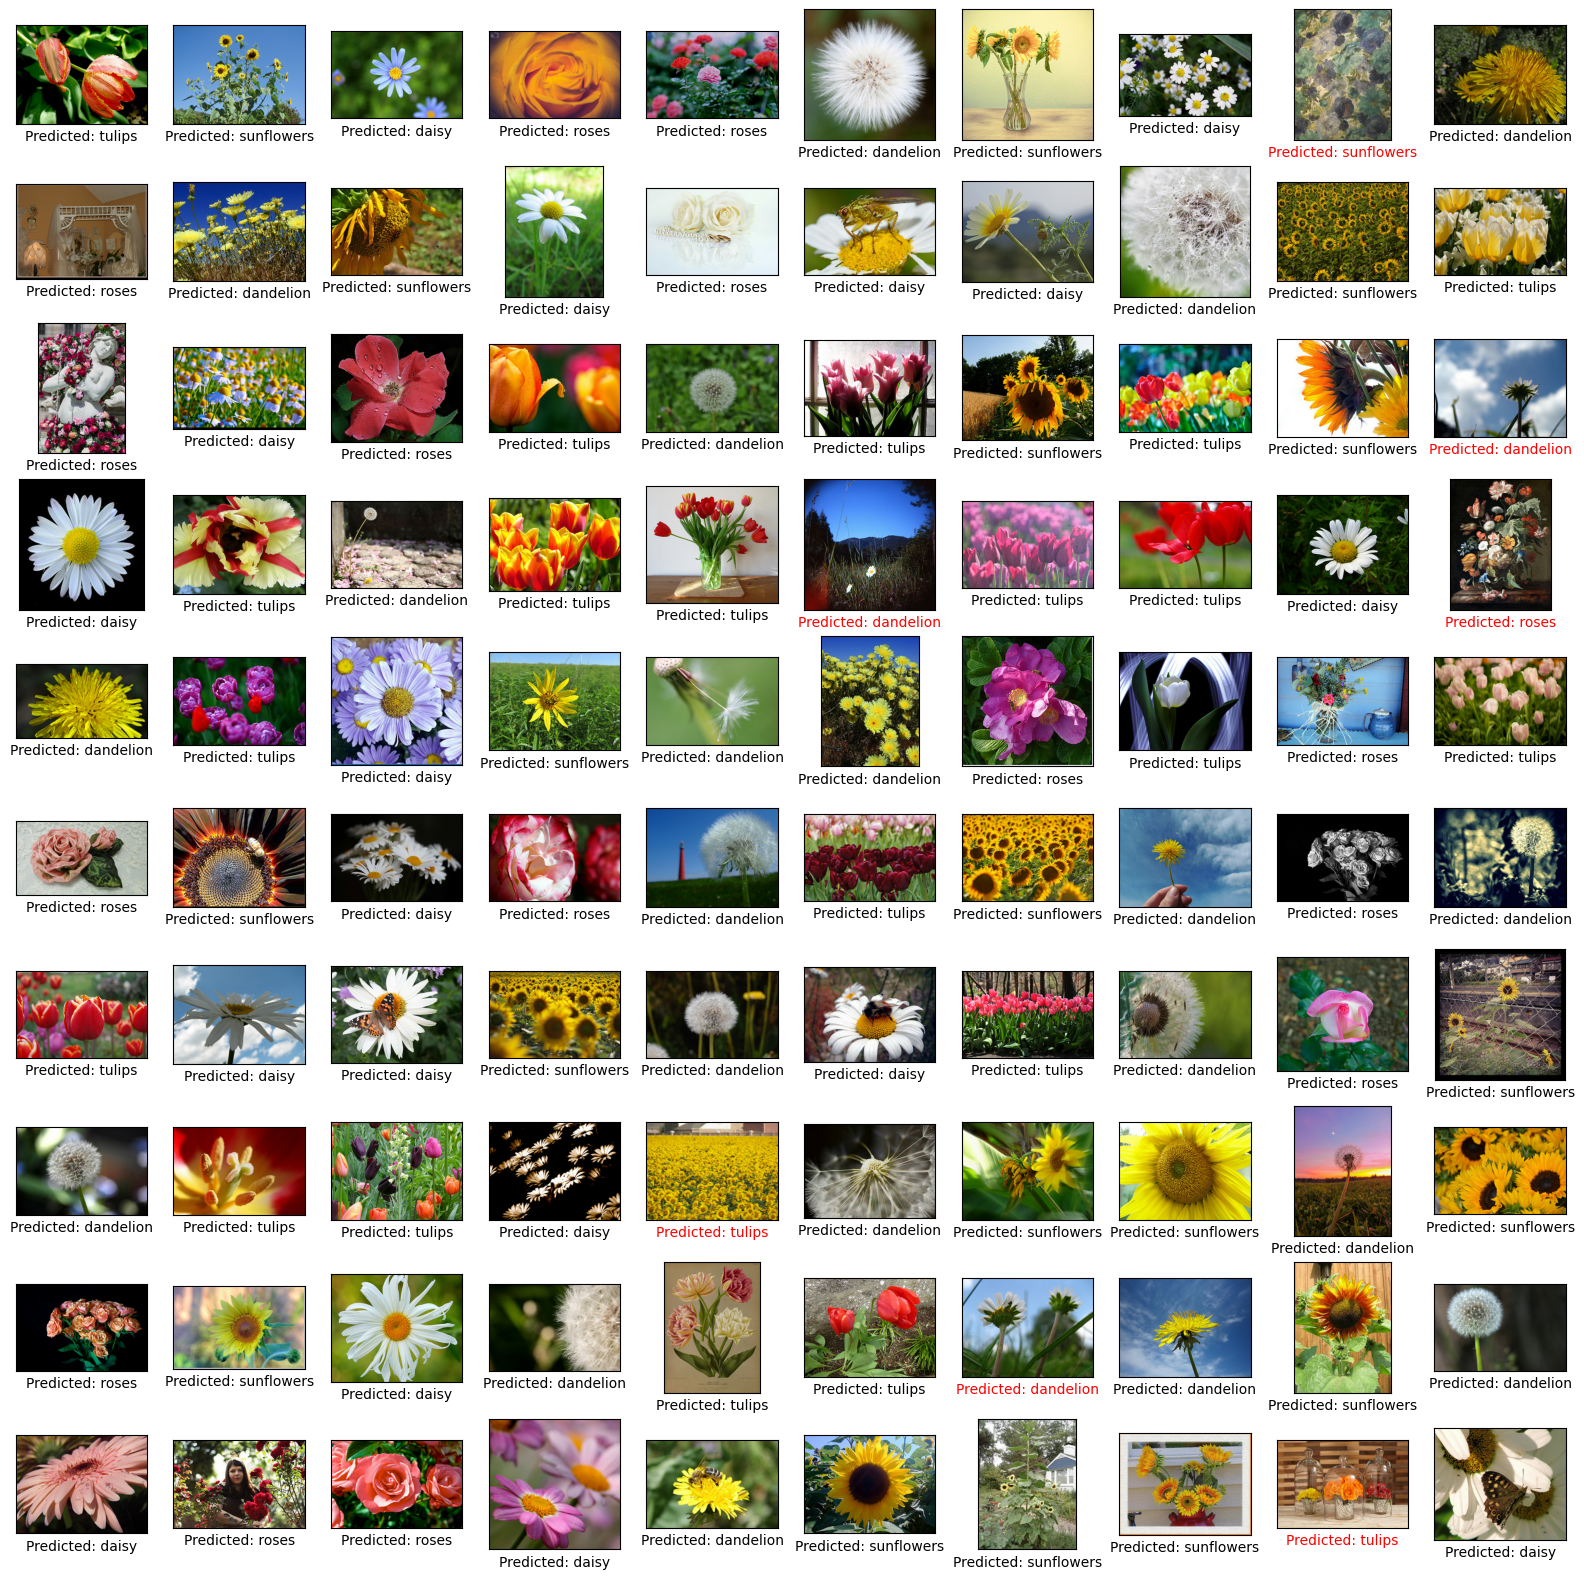

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the trained model to TensorFlow Lite model format with [metadata](https://www.tensorflow.org/lite/models/convert/metadata) so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is `model.tflite`.

In many on-device ML application, the model size is an important factor. Therefore, it is recommended that you apply quantize the model to make it smaller and potentially run faster.
The default post-training quantization technique is full integer quantization for the image classification task.

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpz82rps2d/assets


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpz82rps2d/assets


/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2022-10-20 11:59:36.323069: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-20 11:59:36.323125: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmpfs/tmp/tmp4bvgnng2/labels.txt


INFO:tensorflow:Saving labels in /tmpfs/tmp/tmp4bvgnng2/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


See the image classification [examples guide](https://www.tensorflow.org/lite/examples/image_classification/overview) for more details about how to integrate the TensorFlow Lite model into mobile apps.

This model can be integrated into an Android or an iOS app using the [ImageClassifier API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) of the [TensorFlow Lite Task Library](https://www.tensorflow.org/lite/inference_with_metadata/task_library/overview).

The allowed export formats can be one or a list of the following:

*   `ExportFormat.TFLITE`
*   `ExportFormat.LABEL`
*   `ExportFormat.SAVED_MODEL`

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [ ]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.9128065395095368}

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create` function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Customize Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator inference speed, with a little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker library applies a default post-training quantization techique when exporting the model. If you want to customize post-training quantization, Model Maker supports multiple post-training quantization options using [QuantizationConfig](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/QuantizationConfig) as well. Let's take float16 quantization as an instance. First, define the quantization config.

In [ ]:
config = QuantizationConfig.for_float16()

Then we export the TensorFlow Lite model with such configuration.

In [ ]:
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpoon4gd8m/assets


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpoon4gd8m/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


2022-10-20 12:06:34.099164: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-20 12:06:34.099223: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmpfs/tmp/tmpw66y88rn/labels.txt


INFO:tensorflow:Saving labels in /tmpfs/tmp/tmpw66y88rn/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


In Colab, you can download the model named `model_fp16.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to the MobileNetV2 model specification in `create` method.

In [ ]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 hub_keras_layer_v1v2_2 (Hub  (None, 1280)             2257984   


 KerasLayerV1V2)                                                 


 dropout_2 (Dropout)         (None, 1280)              0         


 dense_2 (Dense)             (None, 5)                 6405      


Total params: 2,264,389


Trainable params: 6,405


Non-trainable params: 2,257,984


_________________________________________________________________


None
Epoch 1/5



 1/91 [..............................] - ETA: 4:46 - loss: 1.7922 - accuracy: 0.2500


 4/91 [>.............................] - ETA: 2s - loss: 1.8236 - accuracy: 0.2031  


 7/91 [=>............................] - ETA: 1s - loss: 1.6148 - accuracy: 0.3348


10/91 [==>...........................] - ETA: 1s - loss: 1.4994 - accuracy: 0.4031


13/91 [===>..........................] - ETA: 1s - loss: 1.4022 - accuracy: 0.4639


16/91 [====>.........................] - ETA: 1s - loss: 1.3197 - accuracy: 0.5156


19/91 [=====>........................] - ETA: 1s - loss: 1.2824 - accuracy: 0.5362


22/91 [======>.......................] - ETA: 1s - loss: 1.2365 - accuracy: 0.5724


25/91 [=======>......................] - ETA: 1s - loss: 1.1971 - accuracy: 0.5950


28/91 [========>.....................] - ETA: 1s - loss: 1.1701 - accuracy: 0.6105


31/91 [=========>....................] - ETA: 1s - loss: 1.1394 - accuracy: 0.6290


34/91 [==========>...................] - ETA: 1s - loss: 1.1062 - accuracy: 0.6498


37/91 [===========>..................] - ETA: 1s - loss: 1.0990 - accuracy: 0.6554


40/91 [============>.................] - ETA: 1s - loss: 1.0833 - accuracy: 0.6656


43/91 [=============>................] - ETA: 1s - loss: 1.0624 - accuracy: 0.6773


46/91 [==============>...............] - ETA: 1s - loss: 1.0464 - accuracy: 0.6841


49/91 [===============>..............] - ETA: 0s - loss: 1.0341 - accuracy: 0.6907


52/91 [================>.............] - ETA: 0s - loss: 1.0167 - accuracy: 0.7001


55/91 [=================>............] - ETA: 0s - loss: 1.0060 - accuracy: 0.7045


58/91 [==================>...........] - ETA: 0s - loss: 0.9929 - accuracy: 0.7123


61/91 [===================>..........] - ETA: 0s - loss: 0.9822 - accuracy: 0.7198


64/91 [====================>.........] - ETA: 0s - loss: 0.9782 - accuracy: 0.7231


67/91 [=====================>........] - ETA: 0s - loss: 0.9685 - accuracy: 0.7285


70/91 [======================>.......] - ETA: 0s - loss: 0.9659 - accuracy: 0.7317


73/91 [=======================>......] - ETA: 0s - loss: 0.9611 - accuracy: 0.7350


76/91 [========================>.....] - ETA: 0s - loss: 0.9534 - accuracy: 0.7405


79/91 [=========================>....] - ETA: 0s - loss: 0.9477 - accuracy: 0.7437


82/91 [==========================>...] - ETA: 0s - loss: 0.9416 - accuracy: 0.7477


85/91 [===========================>..] - ETA: 0s - loss: 0.9350 - accuracy: 0.7511


88/91 [============================>.] - ETA: 0s - loss: 0.9282 - accuracy: 0.7546


91/91 [==============================] - ETA: 0s - loss: 0.9255 - accuracy: 0.7579


91/91 [==============================] - 6s 36ms/step - loss: 0.9255 - accuracy: 0.7579 - val_loss: 0.7592 - val_accuracy: 0.8501


Epoch 2/5



 1/91 [..............................] - ETA: 4s - loss: 0.5524 - accuracy: 0.9688


 4/91 [>.............................] - ETA: 2s - loss: 0.6963 - accuracy: 0.8906


 7/91 [=>............................] - ETA: 1s - loss: 0.6961 - accuracy: 0.9062


10/91 [==>...........................] - ETA: 1s - loss: 0.6941 - accuracy: 0.8969


13/91 [===>..........................] - ETA: 1s - loss: 0.6972 - accuracy: 0.8846


16/91 [====>.........................] - ETA: 1s - loss: 0.6889 - accuracy: 0.8887


19/91 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.8898


22/91 [======>.......................] - ETA: 1s - loss: 0.6978 - accuracy: 0.8878


25/91 [=======>......................] - ETA: 1s - loss: 0.6930 - accuracy: 0.8913


28/91 [========>.....................] - ETA: 1s - loss: 0.6926 - accuracy: 0.8906


31/91 [=========>....................] - ETA: 1s - loss: 0.6881 - accuracy: 0.8942


34/91 [==========>...................] - ETA: 1s - loss: 0.6867 - accuracy: 0.8952


37/91 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.8936


40/91 [============>.................] - ETA: 1s - loss: 0.6864 - accuracy: 0.8945


43/91 [=============>................] - ETA: 1s - loss: 0.6864 - accuracy: 0.8946


46/91 [==============>...............] - ETA: 1s - loss: 0.6892 - accuracy: 0.8906


49/91 [===============>..............] - ETA: 0s - loss: 0.6917 - accuracy: 0.8890


52/91 [================>.............] - ETA: 0s - loss: 0.6871 - accuracy: 0.8924


55/91 [=================>............] - ETA: 0s - loss: 0.6945 - accuracy: 0.8898


58/91 [==================>...........] - ETA: 0s - loss: 0.6921 - accuracy: 0.8912


61/91 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.8888


64/91 [====================>.........] - ETA: 0s - loss: 0.6927 - accuracy: 0.8867


67/91 [=====================>........] - ETA: 0s - loss: 0.6894 - accuracy: 0.8885


70/91 [======================>.......] - ETA: 0s - loss: 0.6934 - accuracy: 0.8848


73/91 [=======================>......] - ETA: 0s - loss: 0.6927 - accuracy: 0.8836


76/91 [========================>.....] - ETA: 0s - loss: 0.6937 - accuracy: 0.8828


79/91 [=========================>....] - ETA: 0s - loss: 0.6923 - accuracy: 0.8833


82/91 [==========================>...] - ETA: 0s - loss: 0.6923 - accuracy: 0.8830


85/91 [===========================>..] - ETA: 0s - loss: 0.6923 - accuracy: 0.8835


88/91 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.8849


91/91 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.8832


91/91 [==============================] - 3s 30ms/step - loss: 0.6945 - accuracy: 0.8832 - val_loss: 0.7106 - val_accuracy: 0.8638


Epoch 3/5



 1/91 [..............................] - ETA: 3s - loss: 0.5789 - accuracy: 0.9375


 4/91 [>.............................] - ETA: 2s - loss: 0.6137 - accuracy: 0.9375


 7/91 [=>............................] - ETA: 2s - loss: 0.6081 - accuracy: 0.9286


10/91 [==>...........................] - ETA: 1s - loss: 0.6026 - accuracy: 0.9344


13/91 [===>..........................] - ETA: 1s - loss: 0.6048 - accuracy: 0.9327


16/91 [====>.........................] - ETA: 1s - loss: 0.6111 - accuracy: 0.9316


19/91 [=====>........................] - ETA: 1s - loss: 0.6205 - accuracy: 0.9260


22/91 [======>.......................] - ETA: 1s - loss: 0.6333 - accuracy: 0.9205


25/91 [=======>......................] - ETA: 1s - loss: 0.6307 - accuracy: 0.9212


28/91 [========>.....................] - ETA: 1s - loss: 0.6354 - accuracy: 0.9208


31/91 [=========>....................] - ETA: 1s - loss: 0.6365 - accuracy: 0.9163


34/91 [==========>...................] - ETA: 1s - loss: 0.6367 - accuracy: 0.9145


37/91 [===========>..................] - ETA: 1s - loss: 0.6478 - accuracy: 0.9071


40/91 [============>.................] - ETA: 1s - loss: 0.6479 - accuracy: 0.9070


43/91 [=============>................] - ETA: 1s - loss: 0.6473 - accuracy: 0.9077


46/91 [==============>...............] - ETA: 1s - loss: 0.6497 - accuracy: 0.9042


49/91 [===============>..............] - ETA: 0s - loss: 0.6517 - accuracy: 0.9011


52/91 [================>.............] - ETA: 0s - loss: 0.6497 - accuracy: 0.9014


55/91 [=================>............] - ETA: 0s - loss: 0.6568 - accuracy: 0.8994


58/91 [==================>...........] - ETA: 0s - loss: 0.6558 - accuracy: 0.9019


61/91 [===================>..........] - ETA: 0s - loss: 0.6561 - accuracy: 0.9022


64/91 [====================>.........] - ETA: 0s - loss: 0.6549 - accuracy: 0.9023


67/91 [=====================>........] - ETA: 0s - loss: 0.6532 - accuracy: 0.9030


70/91 [======================>.......] - ETA: 0s - loss: 0.6564 - accuracy: 0.9022


73/91 [=======================>......] - ETA: 0s - loss: 0.6550 - accuracy: 0.9037


76/91 [========================>.....] - ETA: 0s - loss: 0.6545 - accuracy: 0.9030


79/91 [=========================>....] - ETA: 0s - loss: 0.6549 - accuracy: 0.9023


82/91 [==========================>...] - ETA: 0s - loss: 0.6558 - accuracy: 0.9028


85/91 [===========================>..] - ETA: 0s - loss: 0.6560 - accuracy: 0.9040


88/91 [============================>.] - ETA: 0s - loss: 0.6578 - accuracy: 0.9031


91/91 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.9025


91/91 [==============================] - 3s 31ms/step - loss: 0.6584 - accuracy: 0.9025 - val_loss: 0.7112 - val_accuracy: 0.8583


Epoch 4/5



 1/91 [..............................] - ETA: 4s - loss: 0.5412 - accuracy: 1.0000


 4/91 [>.............................] - ETA: 2s - loss: 0.6238 - accuracy: 0.9297


 7/91 [=>............................] - ETA: 2s - loss: 0.6180 - accuracy: 0.9241


10/91 [==>...........................] - ETA: 1s - loss: 0.6032 - accuracy: 0.9312


13/91 [===>..........................] - ETA: 1s - loss: 0.6068 - accuracy: 0.9327


16/91 [====>.........................] - ETA: 1s - loss: 0.6107 - accuracy: 0.9297


19/91 [=====>........................] - ETA: 1s - loss: 0.6129 - accuracy: 0.9293


22/91 [======>.......................] - ETA: 1s - loss: 0.6201 - accuracy: 0.9205


25/91 [=======>......................] - ETA: 1s - loss: 0.6186 - accuracy: 0.9237


28/91 [========>.....................] - ETA: 1s - loss: 0.6256 - accuracy: 0.9174


31/91 [=========>....................] - ETA: 1s - loss: 0.6205 - accuracy: 0.9214


34/91 [==========>...................] - ETA: 1s - loss: 0.6212 - accuracy: 0.9210


37/91 [===========>..................] - ETA: 1s - loss: 0.6311 - accuracy: 0.9122


40/91 [============>.................] - ETA: 1s - loss: 0.6308 - accuracy: 0.9125


43/91 [=============>................] - ETA: 1s - loss: 0.6285 - accuracy: 0.9142


46/91 [==============>...............] - ETA: 1s - loss: 0.6304 - accuracy: 0.9137


49/91 [===============>..............] - ETA: 0s - loss: 0.6318 - accuracy: 0.9133


52/91 [================>.............] - ETA: 0s - loss: 0.6299 - accuracy: 0.9123


55/91 [=================>............] - ETA: 0s - loss: 0.6338 - accuracy: 0.9097


58/91 [==================>...........] - ETA: 0s - loss: 0.6345 - accuracy: 0.9100


61/91 [===================>..........] - ETA: 0s - loss: 0.6354 - accuracy: 0.9083


64/91 [====================>.........] - ETA: 0s - loss: 0.6356 - accuracy: 0.9077


67/91 [=====================>........] - ETA: 0s - loss: 0.6344 - accuracy: 0.9090


70/91 [======================>.......] - ETA: 0s - loss: 0.6384 - accuracy: 0.9071


73/91 [=======================>......] - ETA: 0s - loss: 0.6359 - accuracy: 0.9092


76/91 [========================>.....] - ETA: 0s - loss: 0.6353 - accuracy: 0.9095


79/91 [=========================>....] - ETA: 0s - loss: 0.6339 - accuracy: 0.9102


82/91 [==========================>...] - ETA: 0s - loss: 0.6349 - accuracy: 0.9097


85/91 [===========================>..] - ETA: 0s - loss: 0.6342 - accuracy: 0.9107


88/91 [============================>.] - ETA: 0s - loss: 0.6331 - accuracy: 0.9112


91/91 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.9104


91/91 [==============================] - 3s 31ms/step - loss: 0.6356 - accuracy: 0.9104 - val_loss: 0.7170 - val_accuracy: 0.8556


Epoch 5/5



 1/91 [..............................] - ETA: 4s - loss: 0.5236 - accuracy: 1.0000


 4/91 [>.............................] - ETA: 2s - loss: 0.6145 - accuracy: 0.9375


 7/91 [=>............................] - ETA: 1s - loss: 0.5935 - accuracy: 0.9375


10/91 [==>...........................] - ETA: 1s - loss: 0.6023 - accuracy: 0.9312


13/91 [===>..........................] - ETA: 1s - loss: 0.5949 - accuracy: 0.9375


16/91 [====>.........................] - ETA: 1s - loss: 0.6032 - accuracy: 0.9336


19/91 [=====>........................] - ETA: 1s - loss: 0.5998 - accuracy: 0.9375


22/91 [======>.......................] - ETA: 1s - loss: 0.6016 - accuracy: 0.9361


25/91 [=======>......................] - ETA: 1s - loss: 0.6042 - accuracy: 0.9350


28/91 [========>.....................] - ETA: 1s - loss: 0.6081 - accuracy: 0.9330


31/91 [=========>....................] - ETA: 1s - loss: 0.6066 - accuracy: 0.9345


34/91 [==========>...................] - ETA: 1s - loss: 0.6081 - accuracy: 0.9320


36/91 [==========>...................] - ETA: 1s - loss: 0.6151 - accuracy: 0.9297


39/91 [===========>..................] - ETA: 1s - loss: 0.6140 - accuracy: 0.9303


42/91 [============>.................] - ETA: 1s - loss: 0.6109 - accuracy: 0.9315


45/91 [=============>................] - ETA: 1s - loss: 0.6160 - accuracy: 0.9285


48/91 [==============>...............] - ETA: 1s - loss: 0.6170 - accuracy: 0.9277


51/91 [===============>..............] - ETA: 0s - loss: 0.6175 - accuracy: 0.9265


54/91 [================>.............] - ETA: 0s - loss: 0.6171 - accuracy: 0.9253


57/91 [=================>............] - ETA: 0s - loss: 0.6197 - accuracy: 0.9238


60/91 [==================>...........] - ETA: 0s - loss: 0.6190 - accuracy: 0.9240


63/91 [===================>..........] - ETA: 0s - loss: 0.6192 - accuracy: 0.9221


66/91 [====================>.........] - ETA: 0s - loss: 0.6158 - accuracy: 0.9247


69/91 [=====================>........] - ETA: 0s - loss: 0.6174 - accuracy: 0.9235


72/91 [======================>.......] - ETA: 0s - loss: 0.6173 - accuracy: 0.9232


75/91 [=======================>......] - ETA: 0s - loss: 0.6152 - accuracy: 0.9246


78/91 [========================>.....] - ETA: 0s - loss: 0.6142 - accuracy: 0.9259


81/91 [=========================>....] - ETA: 0s - loss: 0.6172 - accuracy: 0.9252


84/91 [==========================>...] - ETA: 0s - loss: 0.6204 - accuracy: 0.9237


87/91 [===========================>..] - ETA: 0s - loss: 0.6185 - accuracy: 0.9249


90/91 [============================>.] - ETA: 0s - loss: 0.6207 - accuracy: 0.9229


91/91 [==============================] - 3s 31ms/step - loss: 0.6200 - accuracy: 0.9238 - val_loss: 0.7191 - val_accuracy: 0.8556


Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [ ]:
loss, accuracy = model.evaluate(test_data)


 1/12 [=>............................] - ETA: 4s - loss: 0.6629 - accuracy: 0.8750


 4/12 [=========>....................] - ETA: 0s - loss: 0.6547 - accuracy: 0.8828


 7/12 [================>.............] - ETA: 0s - loss: 0.6689 - accuracy: 0.8705


10/12 [========================>.....] - ETA: 0s - loss: 0.6823 - accuracy: 0.8656


12/12 [==============================] - 1s 22ms/step - loss: 0.6783 - accuracy: 0.8638


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of [image_classifier.ModelSpec](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ModelSpec) and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [ ]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   


 KerasLayerV1V2)                                                 


 dropout_3 (Dropout)         (None, 1280)              0         


 dense_3 (Dense)             (None, 5)                 6405      


Total params: 3,419,429


Trainable params: 6,405


Non-trainable params: 3,413,024


_________________________________________________________________


None
Epoch 1/10



 1/91 [..............................] - ETA: 2:22 - loss: 1.8443 - accuracy: 0.1562


 3/91 [..............................] - ETA: 2s - loss: 1.7785 - accuracy: 0.2396  


 5/91 [>.............................] - ETA: 2s - loss: 1.6981 - accuracy: 0.2875


 7/91 [=>............................] - ETA: 2s - loss: 1.6151 - accuracy: 0.3259


 9/91 [=>............................] - ETA: 2s - loss: 1.5577 - accuracy: 0.3576


11/91 [==>...........................] - ETA: 2s - loss: 1.4972 - accuracy: 0.4034


13/91 [===>..........................] - ETA: 2s - loss: 1.4606 - accuracy: 0.4135


15/91 [===>..........................] - ETA: 2s - loss: 1.4044 - accuracy: 0.4458


17/91 [====>.........................] - ETA: 1s - loss: 1.3543 - accuracy: 0.4779


19/91 [=====>........................] - ETA: 1s - loss: 1.3181 - accuracy: 0.5016


21/91 [=====>........................] - ETA: 1s - loss: 1.2790 - accuracy: 0.5268


23/91 [======>.......................] - ETA: 1s - loss: 1.2454 - accuracy: 0.5448


25/91 [=======>......................] - ETA: 1s - loss: 1.2079 - accuracy: 0.5650


27/91 [=======>......................] - ETA: 1s - loss: 1.1789 - accuracy: 0.5856


29/91 [========>.....................] - ETA: 1s - loss: 1.1571 - accuracy: 0.5981


31/91 [=========>....................] - ETA: 1s - loss: 1.1278 - accuracy: 0.6159


33/91 [=========>....................] - ETA: 1s - loss: 1.1095 - accuracy: 0.6250


35/91 [==========>...................] - ETA: 1s - loss: 1.0938 - accuracy: 0.6339


37/91 [===========>..................] - ETA: 1s - loss: 1.0810 - accuracy: 0.6394


39/91 [===========>..................] - ETA: 1s - loss: 1.0734 - accuracy: 0.6402


41/91 [============>.................] - ETA: 1s - loss: 1.0551 - accuracy: 0.6524


43/91 [=============>................] - ETA: 1s - loss: 1.0378 - accuracy: 0.6628


45/91 [=============>................] - ETA: 1s - loss: 1.0236 - accuracy: 0.6708


47/91 [==============>...............] - ETA: 1s - loss: 1.0116 - accuracy: 0.6769


49/91 [===============>..............] - ETA: 1s - loss: 1.0075 - accuracy: 0.6786


51/91 [===============>..............] - ETA: 1s - loss: 0.9971 - accuracy: 0.6857


53/91 [================>.............] - ETA: 1s - loss: 0.9851 - accuracy: 0.6916


55/91 [=================>............] - ETA: 0s - loss: 0.9807 - accuracy: 0.6943


57/91 [=================>............] - ETA: 0s - loss: 0.9734 - accuracy: 0.6985


59/91 [==================>...........] - ETA: 0s - loss: 0.9651 - accuracy: 0.7034


61/91 [===================>..........] - ETA: 0s - loss: 0.9559 - accuracy: 0.7085


63/91 [===================>..........] - ETA: 0s - loss: 0.9477 - accuracy: 0.7138


65/91 [====================>.........] - ETA: 0s - loss: 0.9434 - accuracy: 0.7168


67/91 [=====================>........] - ETA: 0s - loss: 0.9339 - accuracy: 0.7225


69/91 [=====================>........] - ETA: 0s - loss: 0.9274 - accuracy: 0.7269


71/91 [======================>.......] - ETA: 0s - loss: 0.9252 - accuracy: 0.7284


73/91 [=======================>......] - ETA: 0s - loss: 0.9223 - accuracy: 0.7295


75/91 [=======================>......] - ETA: 0s - loss: 0.9132 - accuracy: 0.7358


77/91 [========================>.....] - ETA: 0s - loss: 0.9074 - accuracy: 0.7390


79/91 [=========================>....] - ETA: 0s - loss: 0.9037 - accuracy: 0.7417


81/91 [=========================>....] - ETA: 0s - loss: 0.8980 - accuracy: 0.7446


83/91 [==========================>...] - ETA: 0s - loss: 0.8945 - accuracy: 0.7462


85/91 [===========================>..] - ETA: 0s - loss: 0.8934 - accuracy: 0.7467


87/91 [===========================>..] - ETA: 0s - loss: 0.8880 - accuracy: 0.7496


89/91 [============================>.] - ETA: 0s - loss: 0.8859 - accuracy: 0.7521


91/91 [==============================] - ETA: 0s - loss: 0.8817 - accuracy: 0.7548


91/91 [==============================] - 5s 38ms/step - loss: 0.8817 - accuracy: 0.7548 - val_loss: 0.7095 - val_accuracy: 0.8692


Epoch 2/10



 1/91 [..............................] - ETA: 4s - loss: 0.5147 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.6196 - accuracy: 0.9167


 5/91 [>.............................] - ETA: 2s - loss: 0.6059 - accuracy: 0.9250


 7/91 [=>............................] - ETA: 2s - loss: 0.6075 - accuracy: 0.9241


 9/91 [=>............................] - ETA: 2s - loss: 0.6297 - accuracy: 0.9062


11/91 [==>...........................] - ETA: 2s - loss: 0.6296 - accuracy: 0.9119


13/91 [===>..........................] - ETA: 2s - loss: 0.6427 - accuracy: 0.9014


15/91 [===>..........................] - ETA: 2s - loss: 0.6405 - accuracy: 0.9021


17/91 [====>.........................] - ETA: 1s - loss: 0.6361 - accuracy: 0.9118


19/91 [=====>........................] - ETA: 1s - loss: 0.6472 - accuracy: 0.9046


21/91 [=====>........................] - ETA: 1s - loss: 0.6521 - accuracy: 0.8988


23/91 [======>.......................] - ETA: 1s - loss: 0.6525 - accuracy: 0.9008


25/91 [=======>......................] - ETA: 1s - loss: 0.6501 - accuracy: 0.9025


27/91 [=======>......................] - ETA: 1s - loss: 0.6467 - accuracy: 0.9039


29/91 [========>.....................] - ETA: 1s - loss: 0.6458 - accuracy: 0.9041


31/91 [=========>....................] - ETA: 1s - loss: 0.6436 - accuracy: 0.9062


33/91 [=========>....................] - ETA: 1s - loss: 0.6475 - accuracy: 0.9053


35/91 [==========>...................] - ETA: 1s - loss: 0.6500 - accuracy: 0.9036


37/91 [===========>..................] - ETA: 1s - loss: 0.6530 - accuracy: 0.9012


39/91 [===========>..................] - ETA: 1s - loss: 0.6573 - accuracy: 0.8982


41/91 [============>.................] - ETA: 1s - loss: 0.6555 - accuracy: 0.9002


43/91 [=============>................] - ETA: 1s - loss: 0.6518 - accuracy: 0.9033


45/91 [=============>................] - ETA: 1s - loss: 0.6502 - accuracy: 0.9042


47/91 [==============>...............] - ETA: 1s - loss: 0.6511 - accuracy: 0.9043


49/91 [===============>..............] - ETA: 1s - loss: 0.6553 - accuracy: 0.9005


51/91 [===============>..............] - ETA: 1s - loss: 0.6536 - accuracy: 0.9013


53/91 [================>.............] - ETA: 1s - loss: 0.6531 - accuracy: 0.9004


55/91 [=================>............] - ETA: 0s - loss: 0.6550 - accuracy: 0.8977


57/91 [=================>............] - ETA: 0s - loss: 0.6581 - accuracy: 0.8964


59/91 [==================>...........] - ETA: 0s - loss: 0.6574 - accuracy: 0.8967


61/91 [===================>..........] - ETA: 0s - loss: 0.6564 - accuracy: 0.8965


63/91 [===================>..........] - ETA: 0s - loss: 0.6553 - accuracy: 0.8983


65/91 [====================>.........] - ETA: 0s - loss: 0.6579 - accuracy: 0.8971


67/91 [=====================>........] - ETA: 0s - loss: 0.6557 - accuracy: 0.8979


69/91 [=====================>........] - ETA: 0s - loss: 0.6562 - accuracy: 0.8990


71/91 [======================>.......] - ETA: 0s - loss: 0.6594 - accuracy: 0.8979


73/91 [=======================>......] - ETA: 0s - loss: 0.6601 - accuracy: 0.8973


75/91 [=======================>......] - ETA: 0s - loss: 0.6574 - accuracy: 0.8988


77/91 [========================>.....] - ETA: 0s - loss: 0.6567 - accuracy: 0.8977


79/91 [=========================>....] - ETA: 0s - loss: 0.6570 - accuracy: 0.8968


81/91 [=========================>....] - ETA: 0s - loss: 0.6556 - accuracy: 0.8978


83/91 [==========================>...] - ETA: 0s - loss: 0.6557 - accuracy: 0.8976


85/91 [===========================>..] - ETA: 0s - loss: 0.6572 - accuracy: 0.8960


87/91 [===========================>..] - ETA: 0s - loss: 0.6561 - accuracy: 0.8969


89/91 [============================>.] - ETA: 0s - loss: 0.6559 - accuracy: 0.8975


91/91 [==============================] - ETA: 0s - loss: 0.6549 - accuracy: 0.8977


91/91 [==============================] - 3s 34ms/step - loss: 0.6549 - accuracy: 0.8977 - val_loss: 0.6701 - val_accuracy: 0.8801


Epoch 3/10



 1/91 [..............................] - ETA: 4s - loss: 0.5278 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.6124 - accuracy: 0.8958


 5/91 [>.............................] - ETA: 2s - loss: 0.5818 - accuracy: 0.9250


 7/91 [=>............................] - ETA: 2s - loss: 0.5848 - accuracy: 0.9241


 9/91 [=>............................] - ETA: 2s - loss: 0.5948 - accuracy: 0.9201


11/91 [==>...........................] - ETA: 2s - loss: 0.5892 - accuracy: 0.9261


13/91 [===>..........................] - ETA: 2s - loss: 0.6031 - accuracy: 0.9159


15/91 [===>..........................] - ETA: 2s - loss: 0.6055 - accuracy: 0.9146


17/91 [====>.........................] - ETA: 1s - loss: 0.6052 - accuracy: 0.9191


19/91 [=====>........................] - ETA: 1s - loss: 0.6117 - accuracy: 0.9161


21/91 [=====>........................] - ETA: 1s - loss: 0.6184 - accuracy: 0.9092


23/91 [======>.......................] - ETA: 1s - loss: 0.6202 - accuracy: 0.9076


25/91 [=======>......................] - ETA: 1s - loss: 0.6173 - accuracy: 0.9125


27/91 [=======>......................] - ETA: 1s - loss: 0.6171 - accuracy: 0.9120


29/91 [========>.....................] - ETA: 1s - loss: 0.6155 - accuracy: 0.9116


31/91 [=========>....................] - ETA: 1s - loss: 0.6148 - accuracy: 0.9113


33/91 [=========>....................] - ETA: 1s - loss: 0.6156 - accuracy: 0.9100


35/91 [==========>...................] - ETA: 1s - loss: 0.6167 - accuracy: 0.9089


37/91 [===========>..................] - ETA: 1s - loss: 0.6212 - accuracy: 0.9062


39/91 [===========>..................] - ETA: 1s - loss: 0.6236 - accuracy: 0.9054


41/91 [============>.................] - ETA: 1s - loss: 0.6213 - accuracy: 0.9070


43/91 [=============>................] - ETA: 1s - loss: 0.6184 - accuracy: 0.9092


45/91 [=============>................] - ETA: 1s - loss: 0.6160 - accuracy: 0.9111


47/91 [==============>...............] - ETA: 1s - loss: 0.6150 - accuracy: 0.9129


49/91 [===============>..............] - ETA: 1s - loss: 0.6166 - accuracy: 0.9133


51/91 [===============>..............] - ETA: 1s - loss: 0.6163 - accuracy: 0.9136


53/91 [================>.............] - ETA: 1s - loss: 0.6154 - accuracy: 0.9133


55/91 [=================>............] - ETA: 0s - loss: 0.6173 - accuracy: 0.9119


57/91 [=================>............] - ETA: 0s - loss: 0.6203 - accuracy: 0.9106


59/91 [==================>...........] - ETA: 0s - loss: 0.6201 - accuracy: 0.9115


61/91 [===================>..........] - ETA: 0s - loss: 0.6194 - accuracy: 0.9119


63/91 [===================>..........] - ETA: 0s - loss: 0.6197 - accuracy: 0.9117


65/91 [====================>.........] - ETA: 0s - loss: 0.6210 - accuracy: 0.9120


67/91 [=====================>........] - ETA: 0s - loss: 0.6192 - accuracy: 0.9132


69/91 [=====================>........] - ETA: 0s - loss: 0.6192 - accuracy: 0.9130


71/91 [======================>.......] - ETA: 0s - loss: 0.6213 - accuracy: 0.9111


73/91 [=======================>......] - ETA: 0s - loss: 0.6222 - accuracy: 0.9110


75/91 [=======================>......] - ETA: 0s - loss: 0.6199 - accuracy: 0.9121


77/91 [========================>.....] - ETA: 0s - loss: 0.6193 - accuracy: 0.9123


79/91 [=========================>....] - ETA: 0s - loss: 0.6200 - accuracy: 0.9114


81/91 [=========================>....] - ETA: 0s - loss: 0.6192 - accuracy: 0.9113


83/91 [==========================>...] - ETA: 0s - loss: 0.6201 - accuracy: 0.9108


85/91 [===========================>..] - ETA: 0s - loss: 0.6214 - accuracy: 0.9103


87/91 [===========================>..] - ETA: 0s - loss: 0.6209 - accuracy: 0.9106


89/91 [============================>.] - ETA: 0s - loss: 0.6227 - accuracy: 0.9101


91/91 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.9107


91/91 [==============================] - 3s 34ms/step - loss: 0.6213 - accuracy: 0.9107 - val_loss: 0.6501 - val_accuracy: 0.8937


Epoch 4/10



 1/91 [..............................] - ETA: 4s - loss: 0.5258 - accuracy: 0.9688


 3/91 [..............................] - ETA: 2s - loss: 0.5875 - accuracy: 0.9167


 5/91 [>.............................] - ETA: 2s - loss: 0.5689 - accuracy: 0.9250


 7/91 [=>............................] - ETA: 2s - loss: 0.5627 - accuracy: 0.9420


 9/91 [=>............................] - ETA: 2s - loss: 0.5732 - accuracy: 0.9375


11/91 [==>...........................] - ETA: 2s - loss: 0.5745 - accuracy: 0.9375


13/91 [===>..........................] - ETA: 2s - loss: 0.5830 - accuracy: 0.9399


15/91 [===>..........................] - ETA: 2s - loss: 0.5789 - accuracy: 0.9438


17/91 [====>.........................] - ETA: 1s - loss: 0.5763 - accuracy: 0.9485


19/91 [=====>........................] - ETA: 1s - loss: 0.5817 - accuracy: 0.9457


21/91 [=====>........................] - ETA: 1s - loss: 0.5881 - accuracy: 0.9420


23/91 [======>.......................] - ETA: 1s - loss: 0.5894 - accuracy: 0.9429


25/91 [=======>......................] - ETA: 1s - loss: 0.5885 - accuracy: 0.9425


27/91 [=======>......................] - ETA: 1s - loss: 0.5861 - accuracy: 0.9421


29/91 [========>.....................] - ETA: 1s - loss: 0.5849 - accuracy: 0.9418


31/91 [=========>....................] - ETA: 1s - loss: 0.5839 - accuracy: 0.9425


33/91 [=========>....................] - ETA: 1s - loss: 0.5860 - accuracy: 0.9413


35/91 [==========>...................] - ETA: 1s - loss: 0.5900 - accuracy: 0.9384


37/91 [===========>..................] - ETA: 1s - loss: 0.5930 - accuracy: 0.9375


39/91 [===========>..................] - ETA: 1s - loss: 0.5969 - accuracy: 0.9335


41/91 [============>.................] - ETA: 1s - loss: 0.5950 - accuracy: 0.9345


43/91 [=============>................] - ETA: 1s - loss: 0.5940 - accuracy: 0.9346


45/91 [=============>................] - ETA: 1s - loss: 0.5927 - accuracy: 0.9347


47/91 [==============>...............] - ETA: 1s - loss: 0.5917 - accuracy: 0.9355


49/91 [===============>..............] - ETA: 1s - loss: 0.5945 - accuracy: 0.9343


51/91 [===============>..............] - ETA: 1s - loss: 0.5940 - accuracy: 0.9326


53/91 [================>.............] - ETA: 1s - loss: 0.5953 - accuracy: 0.9310


55/91 [=================>............] - ETA: 0s - loss: 0.5973 - accuracy: 0.9301


57/91 [=================>............] - ETA: 0s - loss: 0.6006 - accuracy: 0.9293


59/91 [==================>...........] - ETA: 0s - loss: 0.6007 - accuracy: 0.9285


61/91 [===================>..........] - ETA: 0s - loss: 0.6004 - accuracy: 0.9283


63/91 [===================>..........] - ETA: 0s - loss: 0.6001 - accuracy: 0.9286


65/91 [====================>.........] - ETA: 0s - loss: 0.6021 - accuracy: 0.9274


67/91 [=====================>........] - ETA: 0s - loss: 0.6007 - accuracy: 0.9282


69/91 [=====================>........] - ETA: 0s - loss: 0.6010 - accuracy: 0.9275


71/91 [======================>.......] - ETA: 0s - loss: 0.6032 - accuracy: 0.9265


73/91 [=======================>......] - ETA: 0s - loss: 0.6043 - accuracy: 0.9264


75/91 [=======================>......] - ETA: 0s - loss: 0.6018 - accuracy: 0.9271


77/91 [========================>.....] - ETA: 0s - loss: 0.6016 - accuracy: 0.9278


79/91 [=========================>....] - ETA: 0s - loss: 0.6016 - accuracy: 0.9272


81/91 [=========================>....] - ETA: 0s - loss: 0.6006 - accuracy: 0.9279


83/91 [==========================>...] - ETA: 0s - loss: 0.6017 - accuracy: 0.9273


85/91 [===========================>..] - ETA: 0s - loss: 0.6031 - accuracy: 0.9265


87/91 [===========================>..] - ETA: 0s - loss: 0.6028 - accuracy: 0.9267


89/91 [============================>.] - ETA: 0s - loss: 0.6039 - accuracy: 0.9266


91/91 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.9269


91/91 [==============================] - 3s 34ms/step - loss: 0.6031 - accuracy: 0.9269 - val_loss: 0.6392 - val_accuracy: 0.8965


Epoch 5/10



 1/91 [..............................] - ETA: 4s - loss: 0.4916 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.5887 - accuracy: 0.9271


 5/91 [>.............................] - ETA: 2s - loss: 0.5595 - accuracy: 0.9500


 7/91 [=>............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.9554


 9/91 [=>............................] - ETA: 2s - loss: 0.5655 - accuracy: 0.9479


11/91 [==>...........................] - ETA: 2s - loss: 0.5609 - accuracy: 0.9545


13/91 [===>..........................] - ETA: 2s - loss: 0.5745 - accuracy: 0.9495


15/91 [===>..........................] - ETA: 2s - loss: 0.5718 - accuracy: 0.9500


17/91 [====>.........................] - ETA: 1s - loss: 0.5713 - accuracy: 0.9540


19/91 [=====>........................] - ETA: 1s - loss: 0.5757 - accuracy: 0.9556


21/91 [=====>........................] - ETA: 1s - loss: 0.5843 - accuracy: 0.9524


23/91 [======>.......................] - ETA: 1s - loss: 0.5848 - accuracy: 0.9497


25/91 [=======>......................] - ETA: 1s - loss: 0.5817 - accuracy: 0.9488


27/91 [=======>......................] - ETA: 1s - loss: 0.5802 - accuracy: 0.9479


29/91 [========>.....................] - ETA: 1s - loss: 0.5779 - accuracy: 0.9494


31/91 [=========>....................] - ETA: 1s - loss: 0.5755 - accuracy: 0.9516


33/91 [=========>....................] - ETA: 1s - loss: 0.5784 - accuracy: 0.9498


35/91 [==========>...................] - ETA: 1s - loss: 0.5796 - accuracy: 0.9473


37/91 [===========>..................] - ETA: 1s - loss: 0.5833 - accuracy: 0.9443


39/91 [===========>..................] - ETA: 1s - loss: 0.5852 - accuracy: 0.9415


41/91 [============>.................] - ETA: 1s - loss: 0.5832 - accuracy: 0.9428


43/91 [=============>................] - ETA: 1s - loss: 0.5818 - accuracy: 0.9440


45/91 [=============>................] - ETA: 1s - loss: 0.5809 - accuracy: 0.9444


47/91 [==============>...............] - ETA: 1s - loss: 0.5804 - accuracy: 0.9448


49/91 [===============>..............] - ETA: 1s - loss: 0.5828 - accuracy: 0.9426


51/91 [===============>..............] - ETA: 1s - loss: 0.5822 - accuracy: 0.9418


53/91 [================>.............] - ETA: 1s - loss: 0.5828 - accuracy: 0.9416


55/91 [=================>............] - ETA: 0s - loss: 0.5849 - accuracy: 0.9403


57/91 [=================>............] - ETA: 0s - loss: 0.5867 - accuracy: 0.9391


59/91 [==================>...........] - ETA: 0s - loss: 0.5859 - accuracy: 0.9391


61/91 [===================>..........] - ETA: 0s - loss: 0.5859 - accuracy: 0.9380


63/91 [===================>..........] - ETA: 0s - loss: 0.5844 - accuracy: 0.9390


65/91 [====================>.........] - ETA: 0s - loss: 0.5867 - accuracy: 0.9385


67/91 [=====================>........] - ETA: 0s - loss: 0.5855 - accuracy: 0.9389


69/91 [=====================>........] - ETA: 0s - loss: 0.5857 - accuracy: 0.9384


71/91 [======================>.......] - ETA: 0s - loss: 0.5870 - accuracy: 0.9379


73/91 [=======================>......] - ETA: 0s - loss: 0.5876 - accuracy: 0.9379


75/91 [=======================>......] - ETA: 0s - loss: 0.5858 - accuracy: 0.9392


77/91 [========================>.....] - ETA: 0s - loss: 0.5859 - accuracy: 0.9387


79/91 [=========================>....] - ETA: 0s - loss: 0.5866 - accuracy: 0.9379


81/91 [=========================>....] - ETA: 0s - loss: 0.5864 - accuracy: 0.9379


83/91 [==========================>...] - ETA: 0s - loss: 0.5867 - accuracy: 0.9379


85/91 [===========================>..] - ETA: 0s - loss: 0.5887 - accuracy: 0.9364


87/91 [===========================>..] - ETA: 0s - loss: 0.5884 - accuracy: 0.9361


89/91 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.9350


91/91 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.9354


91/91 [==============================] - 3s 34ms/step - loss: 0.5887 - accuracy: 0.9354 - val_loss: 0.6356 - val_accuracy: 0.8965


Epoch 6/10



 1/91 [..............................] - ETA: 4s - loss: 0.5213 - accuracy: 0.9688


 3/91 [..............................] - ETA: 2s - loss: 0.6011 - accuracy: 0.9271


 5/91 [>.............................] - ETA: 2s - loss: 0.5776 - accuracy: 0.9250


 7/91 [=>............................] - ETA: 2s - loss: 0.5732 - accuracy: 0.9375


 9/91 [=>............................] - ETA: 2s - loss: 0.5728 - accuracy: 0.9410


11/91 [==>...........................] - ETA: 2s - loss: 0.5675 - accuracy: 0.9460


13/91 [===>..........................] - ETA: 2s - loss: 0.5723 - accuracy: 0.9447


15/91 [===>..........................] - ETA: 2s - loss: 0.5689 - accuracy: 0.9458


17/91 [====>.........................] - ETA: 1s - loss: 0.5725 - accuracy: 0.9430


19/91 [=====>........................] - ETA: 1s - loss: 0.5727 - accuracy: 0.9457


21/91 [=====>........................] - ETA: 1s - loss: 0.5750 - accuracy: 0.9420


23/91 [======>.......................] - ETA: 1s - loss: 0.5752 - accuracy: 0.9402


25/91 [=======>......................] - ETA: 1s - loss: 0.5737 - accuracy: 0.9425


27/91 [=======>......................] - ETA: 1s - loss: 0.5706 - accuracy: 0.9444


29/91 [========>.....................] - ETA: 1s - loss: 0.5693 - accuracy: 0.9450


31/91 [=========>....................] - ETA: 1s - loss: 0.5688 - accuracy: 0.9435


33/91 [=========>....................] - ETA: 1s - loss: 0.5719 - accuracy: 0.9413


35/91 [==========>...................] - ETA: 1s - loss: 0.5735 - accuracy: 0.9411


37/91 [===========>..................] - ETA: 1s - loss: 0.5760 - accuracy: 0.9400


39/91 [===========>..................] - ETA: 1s - loss: 0.5786 - accuracy: 0.9375


41/91 [============>.................] - ETA: 1s - loss: 0.5764 - accuracy: 0.9398


43/91 [=============>................] - ETA: 1s - loss: 0.5748 - accuracy: 0.9419


45/91 [=============>................] - ETA: 1s - loss: 0.5744 - accuracy: 0.9424


47/91 [==============>...............] - ETA: 1s - loss: 0.5741 - accuracy: 0.9428


49/91 [===============>..............] - ETA: 1s - loss: 0.5752 - accuracy: 0.9407


51/91 [===============>..............] - ETA: 1s - loss: 0.5741 - accuracy: 0.9424


53/91 [================>.............] - ETA: 1s - loss: 0.5750 - accuracy: 0.9416


55/91 [=================>............] - ETA: 0s - loss: 0.5762 - accuracy: 0.9409


57/91 [=================>............] - ETA: 0s - loss: 0.5781 - accuracy: 0.9391


59/91 [==================>...........] - ETA: 0s - loss: 0.5783 - accuracy: 0.9391


61/91 [===================>..........] - ETA: 0s - loss: 0.5774 - accuracy: 0.9401


63/91 [===================>..........] - ETA: 0s - loss: 0.5767 - accuracy: 0.9410


65/91 [====================>.........] - ETA: 0s - loss: 0.5775 - accuracy: 0.9399


67/91 [=====================>........] - ETA: 0s - loss: 0.5763 - accuracy: 0.9398


69/91 [=====================>........] - ETA: 0s - loss: 0.5768 - accuracy: 0.9393


71/91 [======================>.......] - ETA: 0s - loss: 0.5790 - accuracy: 0.9388


73/91 [=======================>......] - ETA: 0s - loss: 0.5794 - accuracy: 0.9379


75/91 [=======================>......] - ETA: 0s - loss: 0.5785 - accuracy: 0.9379


77/91 [========================>.....] - ETA: 0s - loss: 0.5785 - accuracy: 0.9379


79/91 [=========================>....] - ETA: 0s - loss: 0.5794 - accuracy: 0.9375


81/91 [=========================>....] - ETA: 0s - loss: 0.5798 - accuracy: 0.9371


83/91 [==========================>...] - ETA: 0s - loss: 0.5801 - accuracy: 0.9367


85/91 [===========================>..] - ETA: 0s - loss: 0.5813 - accuracy: 0.9360


87/91 [===========================>..] - ETA: 0s - loss: 0.5809 - accuracy: 0.9357


89/91 [============================>.] - ETA: 0s - loss: 0.5820 - accuracy: 0.9350


91/91 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.9358


91/91 [==============================] - 3s 34ms/step - loss: 0.5816 - accuracy: 0.9358 - val_loss: 0.6266 - val_accuracy: 0.9074


Epoch 7/10



 1/91 [..............................] - ETA: 4s - loss: 0.4976 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.5439 - accuracy: 0.9583


 5/91 [>.............................] - ETA: 2s - loss: 0.5297 - accuracy: 0.9625


 7/91 [=>............................] - ETA: 2s - loss: 0.5405 - accuracy: 0.9554


 9/91 [=>............................] - ETA: 2s - loss: 0.5504 - accuracy: 0.9444


11/91 [==>...........................] - ETA: 2s - loss: 0.5470 - accuracy: 0.9489


13/91 [===>..........................] - ETA: 2s - loss: 0.5503 - accuracy: 0.9495


15/91 [===>..........................] - ETA: 2s - loss: 0.5517 - accuracy: 0.9500


17/91 [====>.........................] - ETA: 1s - loss: 0.5488 - accuracy: 0.9522


19/91 [=====>........................] - ETA: 1s - loss: 0.5528 - accuracy: 0.9539


21/91 [=====>........................] - ETA: 1s - loss: 0.5581 - accuracy: 0.9539


23/91 [======>.......................] - ETA: 1s - loss: 0.5577 - accuracy: 0.9538


25/91 [=======>......................] - ETA: 1s - loss: 0.5539 - accuracy: 0.9550


27/91 [=======>......................] - ETA: 1s - loss: 0.5526 - accuracy: 0.9549


29/91 [========>.....................] - ETA: 1s - loss: 0.5526 - accuracy: 0.9547


31/91 [=========>....................] - ETA: 1s - loss: 0.5505 - accuracy: 0.9546


33/91 [=========>....................] - ETA: 1s - loss: 0.5522 - accuracy: 0.9536


35/91 [==========>...................] - ETA: 1s - loss: 0.5536 - accuracy: 0.9545


37/91 [===========>..................] - ETA: 1s - loss: 0.5565 - accuracy: 0.9527


39/91 [===========>..................] - ETA: 1s - loss: 0.5593 - accuracy: 0.9503


41/91 [============>.................] - ETA: 1s - loss: 0.5579 - accuracy: 0.9520


43/91 [=============>................] - ETA: 1s - loss: 0.5565 - accuracy: 0.9528


45/91 [=============>................] - ETA: 1s - loss: 0.5555 - accuracy: 0.9535


47/91 [==============>...............] - ETA: 1s - loss: 0.5556 - accuracy: 0.9528


49/91 [===============>..............] - ETA: 1s - loss: 0.5572 - accuracy: 0.9522


51/91 [===============>..............] - ETA: 1s - loss: 0.5586 - accuracy: 0.9504


53/91 [================>.............] - ETA: 1s - loss: 0.5592 - accuracy: 0.9511


55/91 [=================>............] - ETA: 0s - loss: 0.5619 - accuracy: 0.9489


57/91 [=================>............] - ETA: 0s - loss: 0.5637 - accuracy: 0.9474


59/91 [==================>...........] - ETA: 0s - loss: 0.5638 - accuracy: 0.9476


61/91 [===================>..........] - ETA: 0s - loss: 0.5640 - accuracy: 0.9472


63/91 [===================>..........] - ETA: 0s - loss: 0.5632 - accuracy: 0.9479


65/91 [====================>.........] - ETA: 0s - loss: 0.5650 - accuracy: 0.9457


67/91 [=====================>........] - ETA: 0s - loss: 0.5640 - accuracy: 0.9468


69/91 [=====================>........] - ETA: 0s - loss: 0.5641 - accuracy: 0.9461


71/91 [======================>.......] - ETA: 0s - loss: 0.5654 - accuracy: 0.9459


73/91 [=======================>......] - ETA: 0s - loss: 0.5664 - accuracy: 0.9452


75/91 [=======================>......] - ETA: 0s - loss: 0.5653 - accuracy: 0.9454


77/91 [========================>.....] - ETA: 0s - loss: 0.5653 - accuracy: 0.9452


79/91 [=========================>....] - ETA: 0s - loss: 0.5663 - accuracy: 0.9442


81/91 [=========================>....] - ETA: 0s - loss: 0.5661 - accuracy: 0.9444


83/91 [==========================>...] - ETA: 0s - loss: 0.5674 - accuracy: 0.9435


85/91 [===========================>..] - ETA: 0s - loss: 0.5690 - accuracy: 0.9423


87/91 [===========================>..] - ETA: 0s - loss: 0.5690 - accuracy: 0.9422


89/91 [============================>.] - ETA: 0s - loss: 0.5693 - accuracy: 0.9417


91/91 [==============================] - ETA: 0s - loss: 0.5685 - accuracy: 0.9423


91/91 [==============================] - 3s 34ms/step - loss: 0.5685 - accuracy: 0.9423 - val_loss: 0.6264 - val_accuracy: 0.8965


Epoch 8/10



 1/91 [..............................] - ETA: 3s - loss: 0.5033 - accuracy: 0.9688


 3/91 [..............................] - ETA: 2s - loss: 0.5490 - accuracy: 0.9271


 5/91 [>.............................] - ETA: 2s - loss: 0.5362 - accuracy: 0.9375


 7/91 [=>............................] - ETA: 2s - loss: 0.5417 - accuracy: 0.9420


 9/91 [=>............................] - ETA: 2s - loss: 0.5462 - accuracy: 0.9479


11/91 [==>...........................] - ETA: 2s - loss: 0.5417 - accuracy: 0.9489


13/91 [===>..........................] - ETA: 2s - loss: 0.5552 - accuracy: 0.9399


15/91 [===>..........................] - ETA: 2s - loss: 0.5495 - accuracy: 0.9458


17/91 [====>.........................] - ETA: 1s - loss: 0.5484 - accuracy: 0.9485


19/91 [=====>........................] - ETA: 1s - loss: 0.5505 - accuracy: 0.9490


21/91 [=====>........................] - ETA: 1s - loss: 0.5569 - accuracy: 0.9464


23/91 [======>.......................] - ETA: 1s - loss: 0.5561 - accuracy: 0.9484


25/91 [=======>......................] - ETA: 1s - loss: 0.5532 - accuracy: 0.9488


27/91 [=======>......................] - ETA: 1s - loss: 0.5516 - accuracy: 0.9491


29/91 [========>.....................] - ETA: 1s - loss: 0.5492 - accuracy: 0.9515


31/91 [=========>....................] - ETA: 1s - loss: 0.5480 - accuracy: 0.9526


33/91 [=========>....................] - ETA: 1s - loss: 0.5490 - accuracy: 0.9527


35/91 [==========>...................] - ETA: 1s - loss: 0.5518 - accuracy: 0.9509


37/91 [===========>..................] - ETA: 1s - loss: 0.5517 - accuracy: 0.9519


39/91 [===========>..................] - ETA: 1s - loss: 0.5529 - accuracy: 0.9519


41/91 [============>.................] - ETA: 1s - loss: 0.5517 - accuracy: 0.9535


43/91 [=============>................] - ETA: 1s - loss: 0.5508 - accuracy: 0.9549


45/91 [=============>................] - ETA: 1s - loss: 0.5492 - accuracy: 0.9563


47/91 [==============>...............] - ETA: 1s - loss: 0.5493 - accuracy: 0.9561


49/91 [===============>..............] - ETA: 1s - loss: 0.5525 - accuracy: 0.9534


51/91 [===============>..............] - ETA: 1s - loss: 0.5538 - accuracy: 0.9516


53/91 [================>.............] - ETA: 1s - loss: 0.5551 - accuracy: 0.9499


55/91 [=================>............] - ETA: 0s - loss: 0.5559 - accuracy: 0.9489


57/91 [=================>............] - ETA: 0s - loss: 0.5583 - accuracy: 0.9463


59/91 [==================>...........] - ETA: 0s - loss: 0.5586 - accuracy: 0.9465


61/91 [===================>..........] - ETA: 0s - loss: 0.5581 - accuracy: 0.9477


63/91 [===================>..........] - ETA: 0s - loss: 0.5577 - accuracy: 0.9484


65/91 [====================>.........] - ETA: 0s - loss: 0.5589 - accuracy: 0.9476


67/91 [=====================>........] - ETA: 0s - loss: 0.5578 - accuracy: 0.9492


69/91 [=====================>........] - ETA: 0s - loss: 0.5576 - accuracy: 0.9488


71/91 [======================>.......] - ETA: 0s - loss: 0.5592 - accuracy: 0.9476


73/91 [=======================>......] - ETA: 0s - loss: 0.5596 - accuracy: 0.9473


75/91 [=======================>......] - ETA: 0s - loss: 0.5586 - accuracy: 0.9483


77/91 [========================>.....] - ETA: 0s - loss: 0.5586 - accuracy: 0.9481


79/91 [=========================>....] - ETA: 0s - loss: 0.5599 - accuracy: 0.9466


81/91 [=========================>....] - ETA: 0s - loss: 0.5594 - accuracy: 0.9464


83/91 [==========================>...] - ETA: 0s - loss: 0.5600 - accuracy: 0.9462


85/91 [===========================>..] - ETA: 0s - loss: 0.5615 - accuracy: 0.9452


87/91 [===========================>..] - ETA: 0s - loss: 0.5618 - accuracy: 0.9450


89/91 [============================>.] - ETA: 0s - loss: 0.5630 - accuracy: 0.9445


91/91 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.9451


91/91 [==============================] - 3s 34ms/step - loss: 0.5628 - accuracy: 0.9451 - val_loss: 0.6199 - val_accuracy: 0.9019


Epoch 9/10



 1/91 [..............................] - ETA: 4s - loss: 0.4941 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.5618 - accuracy: 0.9583


 5/91 [>.............................] - ETA: 2s - loss: 0.5408 - accuracy: 0.9625


 7/91 [=>............................] - ETA: 2s - loss: 0.5438 - accuracy: 0.9643


 9/91 [=>............................] - ETA: 2s - loss: 0.5511 - accuracy: 0.9618


11/91 [==>...........................] - ETA: 2s - loss: 0.5473 - accuracy: 0.9631


13/91 [===>..........................] - ETA: 2s - loss: 0.5525 - accuracy: 0.9639


15/91 [===>..........................] - ETA: 2s - loss: 0.5494 - accuracy: 0.9646


17/91 [====>.........................] - ETA: 1s - loss: 0.5524 - accuracy: 0.9614


19/91 [=====>........................] - ETA: 1s - loss: 0.5548 - accuracy: 0.9605


21/91 [=====>........................] - ETA: 1s - loss: 0.5555 - accuracy: 0.9583


23/91 [======>.......................] - ETA: 1s - loss: 0.5534 - accuracy: 0.9592


25/91 [=======>......................] - ETA: 1s - loss: 0.5524 - accuracy: 0.9575


27/91 [=======>......................] - ETA: 1s - loss: 0.5507 - accuracy: 0.9572


29/91 [========>.....................] - ETA: 1s - loss: 0.5501 - accuracy: 0.9569


31/91 [=========>....................] - ETA: 1s - loss: 0.5500 - accuracy: 0.9567


33/91 [=========>....................] - ETA: 1s - loss: 0.5510 - accuracy: 0.9564


35/91 [==========>...................] - ETA: 1s - loss: 0.5519 - accuracy: 0.9545


37/91 [===========>..................] - ETA: 1s - loss: 0.5539 - accuracy: 0.9535


39/91 [===========>..................] - ETA: 1s - loss: 0.5541 - accuracy: 0.9543


41/91 [============>.................] - ETA: 1s - loss: 0.5523 - accuracy: 0.9558


43/91 [=============>................] - ETA: 1s - loss: 0.5495 - accuracy: 0.9578


45/91 [=============>................] - ETA: 1s - loss: 0.5484 - accuracy: 0.9583


47/91 [==============>...............] - ETA: 1s - loss: 0.5475 - accuracy: 0.9594


49/91 [===============>..............] - ETA: 1s - loss: 0.5492 - accuracy: 0.9592


51/91 [===============>..............] - ETA: 1s - loss: 0.5496 - accuracy: 0.9583


53/91 [================>.............] - ETA: 1s - loss: 0.5510 - accuracy: 0.9581


55/91 [=================>............] - ETA: 0s - loss: 0.5535 - accuracy: 0.9557


57/91 [=================>............] - ETA: 0s - loss: 0.5552 - accuracy: 0.9539


59/91 [==================>...........] - ETA: 0s - loss: 0.5551 - accuracy: 0.9534


61/91 [===================>..........] - ETA: 0s - loss: 0.5549 - accuracy: 0.9529


63/91 [===================>..........] - ETA: 0s - loss: 0.5550 - accuracy: 0.9534


65/91 [====================>.........] - ETA: 0s - loss: 0.5563 - accuracy: 0.9529


67/91 [=====================>........] - ETA: 0s - loss: 0.5550 - accuracy: 0.9538


69/91 [=====================>........] - ETA: 0s - loss: 0.5554 - accuracy: 0.9529


71/91 [======================>.......] - ETA: 0s - loss: 0.5567 - accuracy: 0.9516


73/91 [=======================>......] - ETA: 0s - loss: 0.5571 - accuracy: 0.9516


75/91 [=======================>......] - ETA: 0s - loss: 0.5555 - accuracy: 0.9521


77/91 [========================>.....] - ETA: 0s - loss: 0.5551 - accuracy: 0.9521


79/91 [=========================>....] - ETA: 0s - loss: 0.5555 - accuracy: 0.9506


81/91 [=========================>....] - ETA: 0s - loss: 0.5549 - accuracy: 0.9506


83/91 [==========================>...] - ETA: 0s - loss: 0.5552 - accuracy: 0.9499


85/91 [===========================>..] - ETA: 0s - loss: 0.5565 - accuracy: 0.9493


87/91 [===========================>..] - ETA: 0s - loss: 0.5562 - accuracy: 0.9497


89/91 [============================>.] - ETA: 0s - loss: 0.5570 - accuracy: 0.9487


91/91 [==============================] - ETA: 0s - loss: 0.5569 - accuracy: 0.9485


91/91 [==============================] - 3s 34ms/step - loss: 0.5569 - accuracy: 0.9485 - val_loss: 0.6171 - val_accuracy: 0.9019


Epoch 10/10



 1/91 [..............................] - ETA: 4s - loss: 0.4805 - accuracy: 1.0000


 3/91 [..............................] - ETA: 2s - loss: 0.5357 - accuracy: 0.9688


 5/91 [>.............................] - ETA: 2s - loss: 0.5135 - accuracy: 0.9812


 7/91 [=>............................] - ETA: 2s - loss: 0.5188 - accuracy: 0.9777


 9/91 [=>............................] - ETA: 2s - loss: 0.5298 - accuracy: 0.9653


11/91 [==>...........................] - ETA: 2s - loss: 0.5262 - accuracy: 0.9688


13/91 [===>..........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.9615


15/91 [===>..........................] - ETA: 2s - loss: 0.5347 - accuracy: 0.9646


17/91 [====>.........................] - ETA: 1s - loss: 0.5327 - accuracy: 0.9669


19/91 [=====>........................] - ETA: 1s - loss: 0.5378 - accuracy: 0.9655


21/91 [=====>........................] - ETA: 1s - loss: 0.5415 - accuracy: 0.9628


23/91 [======>.......................] - ETA: 1s - loss: 0.5412 - accuracy: 0.9633


25/91 [=======>......................] - ETA: 1s - loss: 0.5395 - accuracy: 0.9625


27/91 [=======>......................] - ETA: 1s - loss: 0.5403 - accuracy: 0.9618


29/91 [========>.....................] - ETA: 1s - loss: 0.5383 - accuracy: 0.9634


31/91 [=========>....................] - ETA: 1s - loss: 0.5391 - accuracy: 0.9627


33/91 [=========>....................] - ETA: 1s - loss: 0.5413 - accuracy: 0.9621


35/91 [==========>...................] - ETA: 1s - loss: 0.5429 - accuracy: 0.9607


37/91 [===========>..................] - ETA: 1s - loss: 0.5438 - accuracy: 0.9595


39/91 [===========>..................] - ETA: 1s - loss: 0.5458 - accuracy: 0.9583


41/91 [============>.................] - ETA: 1s - loss: 0.5448 - accuracy: 0.9596


43/91 [=============>................] - ETA: 1s - loss: 0.5437 - accuracy: 0.9600


45/91 [=============>................] - ETA: 1s - loss: 0.5439 - accuracy: 0.9590


47/91 [==============>...............] - ETA: 1s - loss: 0.5433 - accuracy: 0.9588


49/91 [===============>..............] - ETA: 1s - loss: 0.5451 - accuracy: 0.9579


51/91 [===============>..............] - ETA: 1s - loss: 0.5452 - accuracy: 0.9589


53/91 [================>.............] - ETA: 1s - loss: 0.5457 - accuracy: 0.9587


55/91 [=================>............] - ETA: 0s - loss: 0.5469 - accuracy: 0.9585


57/91 [=================>............] - ETA: 0s - loss: 0.5479 - accuracy: 0.9578


59/91 [==================>...........] - ETA: 0s - loss: 0.5473 - accuracy: 0.9582


61/91 [===================>..........] - ETA: 0s - loss: 0.5476 - accuracy: 0.9585


63/91 [===================>..........] - ETA: 0s - loss: 0.5472 - accuracy: 0.9583


65/91 [====================>.........] - ETA: 0s - loss: 0.5501 - accuracy: 0.9567


67/91 [=====================>........] - ETA: 0s - loss: 0.5489 - accuracy: 0.9576


69/91 [=====================>........] - ETA: 0s - loss: 0.5489 - accuracy: 0.9565


71/91 [======================>.......] - ETA: 0s - loss: 0.5504 - accuracy: 0.9551


73/91 [=======================>......] - ETA: 0s - loss: 0.5508 - accuracy: 0.9551


75/91 [=======================>......] - ETA: 0s - loss: 0.5498 - accuracy: 0.9563


77/91 [========================>.....] - ETA: 0s - loss: 0.5499 - accuracy: 0.9554


79/91 [=========================>....] - ETA: 0s - loss: 0.5506 - accuracy: 0.9553


81/91 [=========================>....] - ETA: 0s - loss: 0.5506 - accuracy: 0.9552


83/91 [==========================>...] - ETA: 0s - loss: 0.5510 - accuracy: 0.9556


85/91 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.9544


87/91 [===========================>..] - ETA: 0s - loss: 0.5531 - accuracy: 0.9537


89/91 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.9529


91/91 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.9536


91/91 [==============================] - 3s 34ms/step - loss: 0.5529 - accuracy: 0.9536 - val_loss: 0.6161 - val_accuracy: 0.9019


Evaluate the newly retrained model with 10 training epochs.

In [ ]:
loss, accuracy = model.evaluate(test_data)


 1/12 [=>............................] - ETA: 4s - loss: 0.6277 - accuracy: 0.9062


 3/12 [======>.......................] - ETA: 0s - loss: 0.6034 - accuracy: 0.9271


 5/12 [===========>..................] - ETA: 0s - loss: 0.6190 - accuracy: 0.9250


 7/12 [================>.............] - ETA: 0s - loss: 0.6172 - accuracy: 0.9241


 9/12 [=====================>........] - ETA: 0s - loss: 0.6168 - accuracy: 0.9236


11/12 [==========================>...] - ETA: 0s - loss: 0.6129 - accuracy: 0.9205


12/12 [==============================] - 1s 25ms/step - loss: 0.6135 - accuracy: 0.9210


# Read more

You can read our [image classification](https://www.tensorflow.org/lite/examples/image_classification/overview) example to learn technical details. For more information, please refer to:

*   TensorFlow Lite Model Maker [guide](https://www.tensorflow.org/lite/models/modify/model_maker) and [API reference](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker).
*   Task Library: [ImageClassifier](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) for deployment.
*   The end-to-end reference apps: [Android](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/android), [iOS](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/ios), and [Raspberry PI](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/raspberry_pi).

